Nama: Dimas Fahrul Rozi

In [7]:
print('Dimas Fahrul Rozi')

Dimas Fahrul Rozi


In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, silhouette_score
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import random
from xgboost import XGBClassifier
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest, norm, t, ttest_ind

import warnings

warnings.filterwarnings('ignore')
def classif_lr(x, y, estimator, th):
    y_pred = estimator.predict_proba(x)[:,1] > th
    print(classification_report(y, y_pred, labels = [1,0]))
    
def classif(x, y, estimator):
    y_pred = estimator.predict(x)
    print(classification_report(y, y_pred, labels = [1,0]))

## Business Understanding

### Business Objectives
Meningkatkan kepuasan pelanggan sehingga pelanggan memberikan rating 5

### Model Objectives
Membuat model klasifikasi untuk menentukan apakah buyer/pelanggan memberikan rating 5 (label 1) atau rating di bawah 5 (label 0)

### Model Success Criteria
Model yang memiliki: Recall > 0.6; Precision > 0.6; FPR < 0.45


## Data

### Data Description

- customer_id : Merupakan suatu identitas dari customer.

- customer_unique_id : Suatu pengidentifikasi customer dari customer lain, id ini bersifat unik atau berbeda dengan customer lain.

- customer_zip_code_prefix : Suatu 5 digit angka pertama dari kode lokasi customer (zip code)

- customer_city : Nama kota dari pelanggan/pembeli (customer)

- customer_state : inisial lokasi daerah bagian si pelanggan

- geolocation_zip_code_prefix: suatu kode pos (zip code) yang terdiri dari 5 angka digit pertama dari geo lokasi

- geolocation_lat : Merupakan suatu garis lintang (latitude) pada lokasi saat ini. 

- geolocation_lng: Merupakan suatu garis bujur (longitude) pada lokasi saat ini. 

- geolocation_city: Namas kota dari lokasi saat ini. 

- geolocation_state: inisial lokasi daerah bagian saat ini.

- order_id : suatu identitas dari order yang bersifat unik.

- order_item_id : Suatu nomor yang berurutan sebagai identitas dari item, fitur tidak bersifat unik.

- product_id : Suatu identitas produk yang bersifat unik (tidak ada yang sama antar satu row dengan row lainnya).

- seller_id : Suatu identitas seller (penjual) yang bersifat unik.

- shipping_limit_date : Merupakan suatu batas waktu penjual melakukan pengiriman ke mitra logistik.

- price : Harga dari suatu item.

- freight_value : Suatu tarif pengiriman dimana kargo tertentu dikirim dari suatu titik ke titik lain.

- payment_sequential : Jika pelanggan melakukan lebih dari satu metode pembayaran, maka urutan pembayaran tersebut akan dibuat dan ditampilkan pada fitur ini.

- payment_type : Suatu metode pembayaran yang dipilih oleh pelanggan.

- payment_installments : Banyaknya jumlah angsuran yang dipilih oleh pelanggan.

- payment_value : Besarnya nilai transaksi yang dilakukan.

- order_status : Suatu status pesanan (delivered, shipped, lainnya).

- order_purchase_timestamp : Tanggal/waktu pembelian terjadi.

- order_approved_at : Tanggal/waktu pembayaran disetujui.

- order_delivered_carrier_date : Tanggal/waktu jika barang telah ditangani ke mitra logistik. 

- order_delivered_customer_date : Tanggal/waktu pengiriman pemesanan yang aktual kepada pelanggan.

- order_estimated_delivery_date : Estimasi taanggal/walut pengiriman yang diinformasikan ke pelanggan pata saat pembelian.

- product_category_name : Merupakan kategori produk yang mana kategori tersebut dalam bahasa portugal.

- product_name_lenght : Jumlah panjang karakter dari nama produk.

- product_description_lenght: Jumlah panjang karakter dari deskripsi produk.

- product_photos_qty : Jumlah foto pada produk yang digunakan (dipublish)

- product_weight_g : Berat produk/barang dalam satuan gram.

- product_length_cm : Panjang produk/barang dalam satuan centimeters.

- product_height_cm : Tinggi produk/barang dalam satuan centimeters.

- product_width_cm : Lebar produk/barang dalam satuan centimeters.

- seller_zip_code_prefix : 5 digit angka kode pos (zip code) pertama dari penjual

- seller_city : nama kota si penjual.

- seller_state : inisial lokasi daerah bagian si penjual.

- product_category_name_english : Merupakan kategori produk yang mana kategori tersebut dalam bahasa Inggris.

- label : merupakan penilaian dari customer,  1 = customer memberikan rating 5, 0 = customer memberikan rating dibawah 5

## Exploratory Data Analysis (EDA)

### General EDA

In [9]:
md = pd.read_csv('model_development_set.csv')

In [10]:
md.head()

customer_id                customer_unique_id  \
0  8b9f55ee19f0356ba6b3f03485e6922d  bc7b9e0d078c0c01f622b38cfcd7ee9c   
1  5dddbfbf5ba7c90dcb52c18d7835b756  2004ba7732339d9be65f2236d8887ae4   
2  c7f26440b498a90f758f26eda34f1801  e64711458e5538f51bc01c3388443450   
3  05e86ce92eb1b627c2296627078d237c  480ca1a9f688a4c482177efdeeb5c3a3   
4  552215a43eb8963b5ea631bde3e63bc5  dbc6ce0dfea576d88ea65af28d09b69e   

   customer_zip_code_prefix   customer_city customer_state  \
0                   20521.0  rio de janeiro             RJ   
1                   22450.0  rio de janeiro             RJ   
2                   20040.0  rio de janeiro             RJ   
3                   21330.0  rio de janeiro             RJ   
4                   56460.0     petrolandia             PE   

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                      20521.0       -22.927008       -43.230270   
1                      22450.0       -22.987642       -43.228795   
2                      20040.0       -22.903826       -43.177436   
3                      21330.0       -22.881837       -43.358881   
4                      56460.0        -8.982786       -38.222378   

  geolocation_city geolocation_state                          order_id  \
0   rio de janeiro                RJ  276e586682c7afb8f69a92fb276dc884   
1   rio de janeiro                RJ  bf25ff262495b0b876bc4f594f736ecf   
2   rio de janeiro                RJ  b686713e41eabb681b6e7948118f24f7   
3   rio de janeiro                RJ  d17ebef6117650c283479ff4dca49c6f   
4      petrolandia                PE  08451f484ac3dba5140399d0b7e0a829   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-03-20 21:55:02  2017-03-20 21:55:02   
1    delivered      2018-05-10 11:23:03  2018-05-10 11:51:37   
2    delivered      2018-03-19 12:14:50  2018-03-19 12:30:39   
3    delivered      2017-07-20 12:00:22  2017-07-20 12:10:08   
4    delivered      2018-01-02 10:32:22  2018-01-03 04:33:26   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-03-23 12:22:48           2017-03-30 13:57:07   
1          2018-05-16 15:29:00           2018-05-22 19:03:49   
2          2018-03-20 17:58:50           2018-04-02 22:36:51   
3          2017-07-24 16:24:55           2017-07-31 19:03:53   
4          2018-01-08 19:42:58           2018-01-22 22:19:07   

  order_estimated_delivery_date  order_item_id  \
0           2017-04-12 00:00:00            1.0   
1           2018-06-14 00:00:00            1.0   
2           2018-04-19 00:00:00            1.0   
3           2017-08-21 00:00:00            1.0   
4           2018-02-14 00:00:00            1.0   

                         product_id                         seller_id  \
0  29b85c2f1ec5f4d02b03737a8fd3698b  44073f8b7e41514de3b7815dd0237f4f   
1  53b36df67ebb7c41585e8d54d6772e08  7d13fca15225358621be4086e1eb0964   
2  ee406bf28024d97771c4b1e8b7e8e219  7a67c85e85bb2ce8582c35f2203ad736   
3  b71ed32edb9ce4684e10a11309011b60  5a93f3ab0ef4c84ed5e1b5dbf23978bc   
4  df3a82b424a1bb351c314547f6644066  4e922959ae960d389249c378d1c939f5   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-03-26 21:55:02  183.00          16.58                 1.0   
1  2018-05-16 11:51:37  115.00           0.00                 1.0   
2  2018-03-23 12:30:39  144.99          17.28                 1.0   
3  2017-08-03 12:10:08   10.00          15.10                 1.0   
4  2018-01-12 04:33:26   65.00          25.73                 1.0   

  payment_type  payment_installments  payment_value product_category_name  \
0  credit_card                   4.0         199.58      moveis_decoracao   
1  credit_card                  10.0         115.00    relogios_presentes   
2  credit_card                   3.0         162.27            cool_stuff   
3  credit_card                   5.0          50.20     alimentos_bebidas   
4       boleto                   1.0          90

In [11]:
md.describe()

customer_zip_code_prefix  geolocation_zip_code_prefix  geolocation_lat  \
count              13645.000000                 13645.000000     13645.000000   
mean               32591.244632                 32591.244632       -21.980551   
std                26926.915187                 26926.915187         4.261715   
min                 1009.000000                  1009.000000       -33.690729   
25%                13087.000000                 13087.000000       -23.581554   
50%                23560.000000                 23560.000000       -22.909804   
75%                38400.000000                 38400.000000       -20.438593   
max                99970.000000                 99970.000000         2.816613   

       geolocation_lng  order_item_id         price  freight_value  \
count     13645.000000   13645.000000  13645.000000   13645.000000   
mean        -45.957749       1.205497    120.053716      19.637410   
std           3.547860       0.711848    183.246923      15.345108   
min         -67.884719       1.000000      1.200000       0.000000   
25%         -47.532049       1.000000     39.900000      13.490000   
50%         -46.472190       1.000000     75.000000      16.210000   
75%         -43.356660       1.000000    134.000000      20.430000   
max         -34.823932      15.000000   4799.000000     375.280000   

       payment_sequential  payment_installments  payment_value  \
count        13644.000000          13644.000000   13644.000000   
mean             1.094840              2.908385     171.660822   
std              0.658019              2.726770     250.935781   
min              1.000000              1.000000       0.010000   
25%              1.000000              1.000000      61.312500   
50%              1.000000              1.000000     108.910000   
75%              1.000000              4.000000     188.520000   
max             19.000000             24.000000    7274.880000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         13453.000000                13453.000000        13453.000000   
mean             48.650338                  769.392329            2.186575   
std              10.042184                  636.565672            1.714097   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  340.000000            1.000000   
50%              51.000000                  594.000000            1.000000   
75%              57.000000                  959.000000            3.000000   
max              66.000000                 3988.000000           18.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      13640.000000       13640.000000       13640.000000   
mean        2118.841789          30.429545          16.728959   
std         3773.584894          16.406090          13.608740   
min            2.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1813.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  seller_zip_code_prefix         label  
count      13640.000000            13645.000000  13645.000000  
mean          23.144941            25186.739758      0.582558  
std           11.739437            28124.998800      0.493155  
min            6.000000             1001.000000      0.000000  
25%           15.000000             7013.000000      0.000000  
50%           20.000000            13920.000000      1.000000  
75%           30.000000            30710.000000      1.000000  
max          105.000000            99730.000000      1.000000

In [12]:
md['customer_zip_code_prefix'].nunique()

4063

In [13]:
#Describe untuk fitur kategori
md.describe(include='object')

customer_id                customer_unique_id  \
count                              13645                             13645   
unique                             11594                             11465   
top     50920f8cd0681fd86ebe93670c8fe52e  41a3b256cc497dc952a815b848345cbc   
freq                                  12                                12   

         customer_city customer_state geolocation_city geolocation_state  \
count            13645          13645            13645             13645   
unique            1167             27             1352                27   
top     rio de janeiro             SP   rio de janeiro                SP   
freq              1716           5118             1715              5118   

                                order_id order_status  \
count                              13645        13645   
unique                             11594            1   
top     1c11d0f4353b31ac3417fbfa5f0f2a8a    delivered   
freq                                  12        13645   

       order_purchase_timestamp    order_approved_at  \
count                     13645                13642   
unique                    11584                11461   
top         2018-01-27 11:28:32  2018-01-29 11:35:23   
freq                         12                   12   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         13645                         13645   
unique                        11239                         11582   
top             2018-01-29 21:52:41           2018-02-16 16:26:53   
freq                             12                            12   

       order_estimated_delivery_date                        product_id  \
count                          13645                             13645   
unique                           416                              7475   
top              2017-12-15 00:00:00  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                              92                                85   

                               seller_id  shipping_limit_date payment_type  \
count                              13645                13645        13644   
unique                              1730                11529            4   
top     4a3ca9315b744ce9f8e9374361493884  2018-02-02 11:31:03  credit_card   
freq                                 264                   12        10095   

       product_category_name seller_city seller_state  \
count                  13453       13645        13645   
unique                    70         415           20   
top          cama_mesa_banho   sao paulo           SP   
freq                    1455        3293         9586   

       product_category_name_english  
count                          13451  
unique                            68  
top                   bed_bath_table  
freq                            1455

In [14]:
feature_identitas_status=['customer_id','customer_unique_id','order_id','product_id','seller_id','customer_zip_code_prefix','customer_city','geolocation_city','seller_city','geolocation_zip_code_prefix','seller_zip_code_prefix','order_status']
md=md.drop(feature_identitas_status, axis=1)

In [15]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_state                 13645 non-null  object 
 1   geolocation_lat                13645 non-null  float64
 2   geolocation_lng                13645 non-null  float64
 3   geolocation_state              13645 non-null  object 
 4   order_purchase_timestamp       13645 non-null  object 
 5   order_approved_at              13642 non-null  object 
 6   order_delivered_carrier_date   13645 non-null  object 
 7   order_delivered_customer_date  13645 non-null  object 
 8   order_estimated_delivery_date  13645 non-null  object 
 9   order_item_id                  13645 non-null  float64
 10  shipping_limit_date            13645 non-null  object 
 11  price                          13645 non-null  float64
 12  freight_value                  13645 non-null 

In [16]:
md.isnull().sum()/len(md)

customer_state                   0.000000
geolocation_lat                  0.000000
geolocation_lng                  0.000000
geolocation_state                0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000220
order_delivered_carrier_date     0.000000
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.000073
payment_type                     0.000073
payment_installments             0.000073
payment_value                    0.000073
product_category_name            0.014071
product_name_lenght              0.014071
product_description_lenght       0.014071
product_photos_qty               0.014071
product_weight_g                 0.000366
product_length_cm                0.000366
product_height_cm                0

### Analisis Univariat

In [17]:
#Pseudo numerik
pseudo_num = ['order_item_id', 'payment_sequential', 'payment_installments','product_photos_qty']
number = list(md.select_dtypes('number').columns)
for x in pseudo_num:
    number.remove(x)

In [18]:
#datetimer
data_date=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date']
cat = list(md.select_dtypes('object').columns)
for x in data_date:
    cat.remove(x)

In [19]:
#Filter numerik dan categorial data utuh
md_num=md[number]
md_pseudo_num=md[pseudo_num]
md_cat=md[cat]
md_data_date=md[data_date]

In [20]:
md_cat_all=pd.concat([md_cat, md_pseudo_num],axis=1)

#### Numeric

1
geolocation_lat


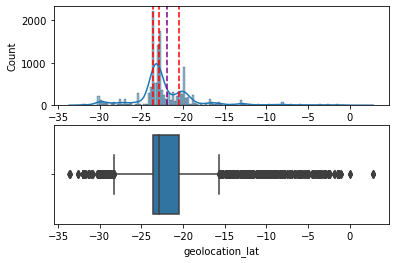

DATA SKEWED ,dengan nilai skew: 1.7744047968235386
count    13645.000000
mean       -21.980551
std          4.261715
min        -33.690729
25%        -23.581554
50%        -22.909804
75%        -20.438593
max          2.816613
Name: geolocation_lat, dtype: float64
iqr : 3.14296073721178
lower whisker: -28.293151402205805
upper whisker: -15.74009395475793
outlier: [-8.982786451748725, -8.183975780074155, -14.247193108742282, -10.934456694725904, -30.042202499999995, -32.05165364422402, -1.2941965718163198, -6.084360495285523, -14.23520702148562, -28.39381391018308, -13.006447198164942, -2.573244675308688, -15.5823819169291, -15.588089790130295, -7.098442938201267, -13.004049520399334, -28.37718387568899, -13.085604481921203, -12.077867684428751, -30.03386842964012, -29.67333648447753, -29.488635134923005, -29.162494308842305, -8.615280733073755, -5.090776844294895, -30.14296083790186, -29.994984923105864, -29.71737704887283, -29.33195174413561, -29.65906814296313, -8.119538392723213, -1

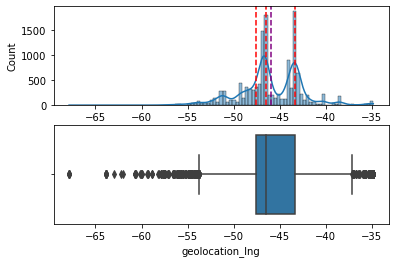

DATA SKEWED ,dengan nilai skew: -0.3500697442489406
count    13645.000000
mean       -45.957749
std          3.547860
min        -67.884719
25%        -47.532049
50%        -46.472190
75%        -43.356660
max        -34.823932
Name: geolocation_lng, dtype: float64
iqr : 4.175389225161517
lower whisker: -53.78050891145901
upper whisker: -37.09752376430288
outlier: [-34.92032997579382, -37.06358089829695, -53.92420333364961, -56.05731629438723, -56.09356509014755, -34.83580362839634, -53.92394093671219, -55.907848381096144, -54.6937042783334, -35.29031889341569, -55.72553971540075, -36.6804706378582, -35.16913763904442, -54.66391971021785, -53.81858413988113, -37.06034490423461, -34.89833932070516, -35.24258383542035, -34.91168845268046, -63.89801770038158, -34.83448789754842, -53.84801065762953, -37.04955726908646, -34.92540587870053, -57.0880122175509, -35.24033415167612, -53.89150848665444, -57.493209786067055, -35.73219517208147, -35.70528427814836, -55.23392116976711, -54.874039467

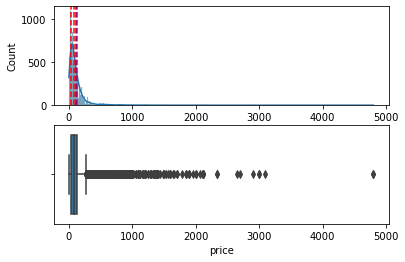

DATA SKEWED ,dengan nilai skew: 7.935146192564905
count    13645.000000
mean       120.053716
std        183.246923
min          1.200000
25%         39.900000
50%         75.000000
75%        134.000000
max       4799.000000
Name: price, dtype: float64
iqr : 94.1
lower whisker: 1.2
upper whisker: 275.0
outlier: [600.0, 279.99, 349.0, 279.0, 314.97, 299.99, 899.0, 325.0, 659.99, 329.9, 335.0, 498.0, 329.0, 539.0, 599.0, 535.0, 750.0, 667.0, 290.0, 329.9, 295.0, 319.0, 329.99, 285.0, 620.1, 1011.86, 335.0, 289.0, 759.9, 289.0, 335.9, 2649.0, 290.0, 467.0, 349.9, 504.0, 325.49, 385.0, 2110.0, 599.0, 519.99, 539.0, 969.0, 429.9, 339.0, 300.0, 460.0, 362.45, 349.9, 329.0, 288.0, 289.9, 299.0, 399.9, 329.9, 309.99, 539.0, 284.99, 649.9, 399.0, 299.0, 297.0, 419.9, 650.0, 659.99, 419.9, 528.0, 699.9, 279.9, 283.2, 284.99, 350.0, 489.99, 499.9, 2700.0, 458.0, 890.0, 299.9, 412.0, 522.5, 690.0, 510.0, 579.8, 314.99, 499.0, 359.0, 989.1, 1330.0, 1350.0, 2110.0, 341.65, 610.0, 2899.0, 326.16, 46

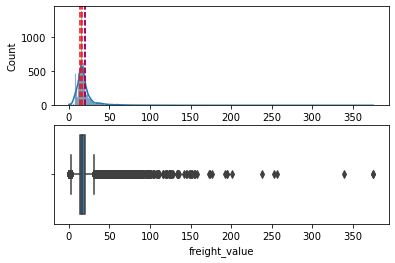

DATA SKEWED ,dengan nilai skew: 6.582456771858829
count    13645.000000
mean        19.637410
std         15.345108
min          0.000000
25%         13.490000
50%         16.210000
75%         20.430000
max        375.280000
Name: freight_value, dtype: float64
iqr : 6.9399999999999995
lower whisker: 3.09
upper whisker: 30.84
outlier: [0.0, 34.46, 256.13, 39.79, 66.63, 40.38, 48.99, 47.43, 50.34, 88.37, 45.44, 31.23, 58.88, 34.04, 35.99, 53.79, 37.37, 67.49, 38.52, 41.58, 84.15, 41.15, 38.53, 64.25, 34.44, 31.96, 60.74, 40.44, 31.79, 43.33, 0.0, 40.34, 90.98, 38.18, 33.09, 37.64, 35.05, 37.38, 36.78, 49.09, 2.7, 31.63, 51.74, 46.48, 52.12, 98.53, 45.09, 34.15, 86.34, 33.33, 32.29, 37.97, 41.33, 34.94, 66.21, 57.08, 33.08, 45.86, 103.22, 0.0, 73.41, 0.0, 37.3, 35.86, 35.67, 35.97, 71.92, 37.44, 45.25, 37.3, 89.36, 41.02, 33.39, 77.8, 141.36, 35.82, 31.0, 69.33, 57.08, 35.38, 45.12, 2.87, 58.78, 69.94, 65.54, 71.92, 34.57, 35.53, 53.83, 39.4, 59.98, 36.6, 39.53, 39.42, 82.07, 34.54, 37.3

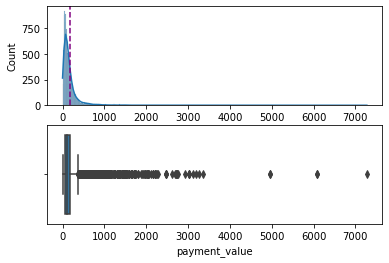

DATA TIDAK SKEWED
count    13644.000000
mean       171.660822
std        250.935781
min          0.010000
25%         61.312500
50%        108.910000
75%        188.520000
max       7274.880000
Name: payment_value, dtype: float64
iqr : 127.20750000000001
lower whisker: 0.01
upper whisker: 378.4
outlier: [856.13, 558.68, 1440.1, 921.05, 676.74, 527.57, 560.65, 1989.75, 503.71, 383.3, 489.24, 465.48, 575.44, 778.05, 687.43, 573.56, 420.88, 580.41, 421.12, 641.18, 464.95, 1036.83, 1006.44, 779.98, 1225.65, 1014.02, 620.68, 2681.29, 1032.35, 484.02, 523.72, 870.35, 413.77, 2213.22, 672.41, 539.88, 610.92, 387.64, 392.86, 990.54, 450.19, 1351.44, 540.06, 385.86, 491.26, 574.26, 870.35, 386.93, 643.16, 465.42, 469.84, 610.92, 3018.6, 410.1, 673.42, 577.54, 416.54, 414.4, 475.2, 940.78, 714.91, 721.74, 888.84, 468.0, 421.47, 430.09, 543.83, 712.05, 404.04, 470.38, 769.08, 3018.6, 413.84, 412.2, 574.51, 526.78, 445.6, 2734.66, 471.33, 838.97, 381.69, 487.38, 425.46, 1066.86, 435.72, 455.96, 54

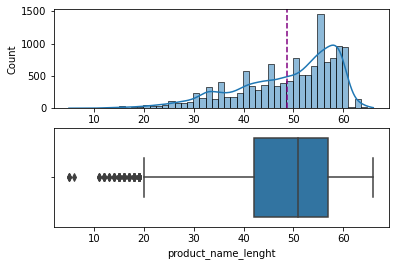

DATA TIDAK SKEWED
count    13453.000000
mean        48.650338
std         10.042184
min          5.000000
25%         42.000000
50%         51.000000
75%         57.000000
max         66.000000
Name: product_name_lenght, dtype: float64
iqr : 15.0
lower whisker: 20.0
upper whisker: 66.0
outlier: [15.0, 12.0, 19.0, 19.0, 19.0, 12.0, 14.0, 5.0, 18.0, 14.0, 17.0, 19.0, 19.0, 18.0, 15.0, 19.0, 19.0, 19.0, 14.0, 12.0, 15.0, 18.0, 14.0, 18.0, 16.0, 12.0, 16.0, 17.0, 18.0, 15.0, 14.0, 5.0, 16.0, 18.0, 16.0, 16.0, 19.0, 13.0, 19.0, 15.0, 18.0, 19.0, 19.0, 19.0, 18.0, 17.0, 12.0, 15.0, 19.0, 15.0, 19.0, 17.0, 16.0, 16.0, 18.0, 16.0, 18.0, 18.0, 17.0, 18.0, 19.0, 11.0, 15.0, 15.0, 15.0, 12.0, 12.0, 17.0, 16.0, 5.0, 15.0, 19.0, 19.0, 18.0, 18.0, 17.0, 16.0, 19.0, 13.0, 17.0, 13.0, 19.0, 15.0, 11.0, 12.0, 19.0, 11.0, 16.0, 19.0, 18.0, 14.0, 15.0, 16.0, 15.0, 15.0, 18.0, 15.0, 14.0, 17.0, 19.0, 16.0, 17.0, 6.0, 15.0, 18.0, 16.0, 19.0]
outlier counts: 107
*********************************************

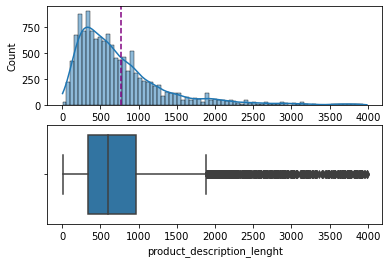

DATA TIDAK SKEWED
count    13453.000000
mean       769.392329
std        636.565672
min          4.000000
25%        340.000000
50%        594.000000
75%        959.000000
max       3988.000000
Name: product_description_lenght, dtype: float64
iqr : 619.0
lower whisker: 4.0
upper whisker: 1887.0
outlier: [1892.0, 3723.0, 1893.0, 2556.0, 1976.0, 1994.0, 2795.0, 1893.0, 3675.0, 2022.0, 2148.0, 3616.0, 2644.0, 2526.0, 2009.0, 2214.0, 1941.0, 2130.0, 2951.0, 3751.0, 3231.0, 3694.0, 3077.0, 2162.0, 2584.0, 1912.0, 2125.0, 1914.0, 3728.0, 2715.0, 3930.0, 2124.0, 1976.0, 2876.0, 1953.0, 1893.0, 2214.0, 2017.0, 1959.0, 2819.0, 2676.0, 3207.0, 1917.0, 2020.0, 1979.0, 2911.0, 3189.0, 3329.0, 3866.0, 2088.0, 2026.0, 1893.0, 2667.0, 1893.0, 2582.0, 2112.0, 1972.0, 2018.0, 2416.0, 2066.0, 3314.0, 2083.0, 2936.0, 2304.0, 2667.0, 2654.0, 2168.0, 1974.0, 1893.0, 1893.0, 2526.0, 3060.0, 2887.0, 3571.0, 3703.0, 2432.0, 2164.0, 2400.0, 1953.0, 2596.0, 2245.0, 1912.0, 3006.0, 2641.0, 3161.0, 2010.0, 3109.0

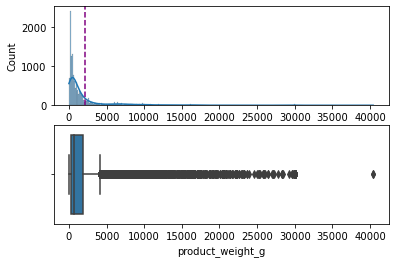

DATA TIDAK SKEWED
count    13640.000000
mean      2118.841789
std       3773.584894
min          2.000000
25%        300.000000
50%        700.000000
75%       1813.000000
max      40425.000000
Name: product_weight_g, dtype: float64
iqr : 1513.0
lower whisker: 2.0
upper whisker: 4075.0
outlier: [5650.0, 5000.0, 29700.0, 9000.0, 16650.0, 6550.0, 6950.0, 8250.0, 12250.0, 12250.0, 9350.0, 5650.0, 5950.0, 6400.0, 7000.0, 15100.0, 5000.0, 9700.0, 5350.0, 7000.0, 5850.0, 5650.0, 6800.0, 4100.0, 8950.0, 25250.0, 6700.0, 13300.0, 10750.0, 16250.0, 5400.0, 9400.0, 9650.0, 18650.0, 7000.0, 8200.0, 5700.0, 22100.0, 9225.0, 9625.0, 9750.0, 5417.0, 4105.0, 8450.0, 5550.0, 4338.0, 10300.0, 5950.0, 7350.0, 12250.0, 9200.0, 8500.0, 13800.0, 13600.0, 9750.0, 4100.0, 9300.0, 8700.0, 9750.0, 4800.0, 4750.0, 10250.0, 10150.0, 9750.0, 16100.0, 4338.0, 20600.0, 5950.0, 10600.0, 4100.0, 22350.0, 19800.0, 10075.0, 7050.0, 4800.0, 7200.0, 8875.0, 7225.0, 16650.0, 8683.0, 9000.0, 8000.0, 6900.0, 4850.0, 15833.0

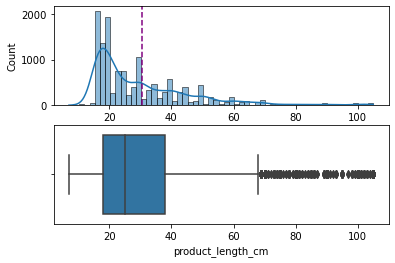

DATA TIDAK SKEWED
count    13640.000000
mean        30.429545
std         16.406090
min          7.000000
25%         18.000000
50%         25.000000
75%         38.000000
max        105.000000
Name: product_length_cm, dtype: float64
iqr : 20.0
lower whisker: 7.0
upper whisker: 68.0
outlier: [105.0, 105.0, 80.0, 75.0, 86.0, 100.0, 70.0, 105.0, 89.0, 78.0, 101.0, 69.0, 86.0, 69.0, 80.0, 70.0, 70.0, 71.0, 74.0, 95.0, 105.0, 80.0, 102.0, 98.0, 90.0, 75.0, 95.0, 81.0, 89.0, 69.0, 80.0, 105.0, 103.0, 69.0, 98.0, 70.0, 105.0, 90.0, 70.0, 80.0, 86.0, 69.0, 90.0, 70.0, 80.0, 105.0, 103.0, 70.0, 78.0, 69.0, 92.0, 95.0, 69.0, 80.0, 86.0, 69.0, 70.0, 101.0, 90.0, 99.0, 75.0, 100.0, 90.0, 105.0, 102.0, 70.0, 105.0, 103.0, 89.0, 74.0, 90.0, 74.0, 78.0, 86.0, 100.0, 70.0, 75.0, 101.0, 100.0, 80.0, 79.0, 100.0, 90.0, 104.0, 69.0, 105.0, 70.0, 81.0, 69.0, 81.0, 85.0, 69.0, 75.0, 90.0, 73.0, 93.0, 85.0, 102.0, 85.0, 70.0, 71.0, 80.0, 80.0, 105.0, 84.0, 75.0, 93.0, 81.0, 74.0, 105.0, 70.0, 70.0, 70.0, 1

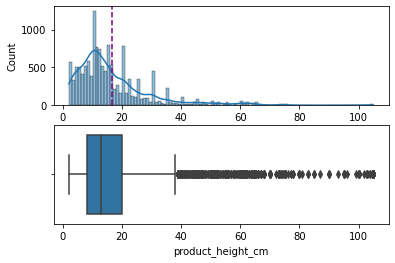

DATA TIDAK SKEWED
count    13640.000000
mean        16.728959
std         13.608740
min          2.000000
25%          8.000000
50%         13.000000
75%         20.000000
max        105.000000
Name: product_height_cm, dtype: float64
iqr : 12.0
lower whisker: 2.0
upper whisker: 38.0
outlier: [61.0, 50.0, 47.0, 40.0, 50.0, 40.0, 41.0, 43.0, 44.0, 40.0, 61.0, 53.0, 55.0, 50.0, 60.0, 45.0, 47.0, 55.0, 61.0, 52.0, 50.0, 40.0, 42.0, 49.0, 45.0, 62.0, 52.0, 60.0, 74.0, 60.0, 40.0, 63.0, 50.0, 48.0, 55.0, 65.0, 52.0, 40.0, 74.0, 40.0, 45.0, 64.0, 62.0, 63.0, 52.0, 103.0, 58.0, 64.0, 40.0, 45.0, 50.0, 47.0, 105.0, 40.0, 65.0, 64.0, 55.0, 40.0, 100.0, 105.0, 40.0, 39.0, 60.0, 64.0, 52.0, 40.0, 55.0, 62.0, 46.0, 44.0, 61.0, 60.0, 99.0, 40.0, 39.0, 51.0, 57.0, 65.0, 50.0, 64.0, 46.0, 56.0, 50.0, 95.0, 80.0, 47.0, 61.0, 60.0, 44.0, 43.0, 64.0, 51.0, 42.0, 75.0, 50.0, 40.0, 65.0, 65.0, 44.0, 39.0, 40.0, 62.0, 45.0, 60.0, 100.0, 75.0, 40.0, 40.0, 40.0, 48.0, 103.0, 60.0, 40.0, 47.0, 55.0, 58.0, 52.0

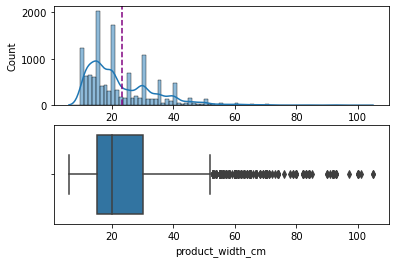

DATA TIDAK SKEWED
count    13640.000000
mean        23.144941
std         11.739437
min          6.000000
25%         15.000000
50%         20.000000
75%         30.000000
max        105.000000
Name: product_width_cm, dtype: float64
iqr : 15.0
lower whisker: 6.0
upper whisker: 52.0
outlier: [82.0, 92.0, 70.0, 91.0, 70.0, 74.0, 67.0, 80.0, 70.0, 53.0, 60.0, 53.0, 71.0, 65.0, 74.0, 61.0, 60.0, 92.0, 61.0, 82.0, 60.0, 83.0, 61.0, 80.0, 53.0, 55.0, 70.0, 70.0, 60.0, 55.0, 78.0, 60.0, 62.0, 55.0, 60.0, 53.0, 63.0, 58.0, 55.0, 70.0, 56.0, 65.0, 55.0, 92.0, 65.0, 53.0, 74.0, 63.0, 60.0, 63.0, 69.0, 92.0, 55.0, 60.0, 65.0, 83.0, 85.0, 61.0, 93.0, 68.0, 58.0, 56.0, 67.0, 72.0, 61.0, 71.0, 60.0, 79.0, 53.0, 65.0, 84.0, 97.0, 93.0, 74.0, 58.0, 92.0, 70.0, 53.0, 53.0, 65.0, 55.0, 55.0, 67.0, 60.0, 55.0, 70.0, 74.0, 92.0, 67.0, 65.0, 90.0, 63.0, 63.0, 100.0, 57.0, 58.0, 65.0, 70.0, 53.0, 55.0, 56.0, 65.0, 54.0, 105.0, 70.0, 70.0, 65.0, 66.0, 69.0, 54.0, 67.0, 58.0, 65.0, 56.0, 60.0, 60.0, 55.0, 57.

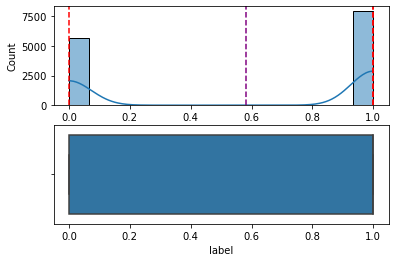

DATA SKEWED ,dengan nilai skew: -0.33482660006845766
count    13645.000000
mean         0.582558
std          0.493155
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64
iqr : 1.0
lower whisker: 0
upper whisker: 1
outlier: []
outlier counts: 0
**************************************************


In [21]:
#Membuat fungsi whisk untuk menentukan data outlier
def whisk(x):

    q1=np.nanpercentile(x,25)
    q3=np.nanpercentile(x,75)
    iqr=q3-q1
    lower_fence=q1-1.5*iqr
    upper_fence=q3+1.5*iqr
    
    #Mengidentifikasi non-outlier menggunakan lower dan upper fence
    non_outlier=[]
    for num in x:
        if num >= lower_fence:
            if num <= upper_fence:
                non_outlier.append(num)
    lower_whisker=np.min(non_outlier)
    upper_whisker=np.max(non_outlier)
    
    #Mengidentifikasi outlier menggunakan lower dan upper fence
    outlier=[]
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
    
    outlier_count = len(outlier)
    
    print('iqr : {}'.format(iqr))
    print('lower whisker: {}'.format(lower_whisker))
    print('upper whisker: {}'.format(upper_whisker))
    print('outlier: {}'.format(outlier))
    print('outlier counts: {}'.format(outlier_count))
    
number=1
for x in md_num.columns:
    print(number)
    print(x)
    #Membuat histogram dan boxplot
    fig, axs=plt.subplots(2,1)
    sns.histplot(data=md_num, x=x, kde=True, ax=axs[0])
    axs[0].axvline(np.percentile(md_num[x], 25), color='red', linestyle='--')
    axs[0].axvline(np.percentile(md_num[x], 50), color='red', linestyle='--')
    axs[0].axvline(np.percentile(md_num[x], 75), color='red', linestyle='--')
    axs[0].axvline(np.mean(md_num[x]), color='purple', linestyle='--')
    sns.boxplot(data=md_num, x=x, ax=axs[1])
    plt.show()
    #Menghitung Skew
    sk=skew(md_num[x])
    stat, p_value=skewtest(md_num[x])
    if p_value < 0.05:
        print('DATA SKEWED ,dengan nilai skew: {}'.format(sk))
    else:
        print('DATA TIDAK SKEWED')
        
    # metode describe
    print(md_num[x].describe())
    # lower_whisker, upper_whisker, outlier, outlier_count
    whisk(md_num[x])
    
    print('*'*50)
    number += 1

#### Categorical

1
customer_state


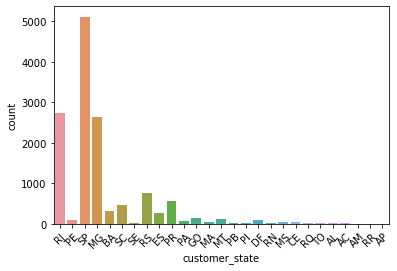

SP    5118
RJ    2734
MG    2648
RS     755
PR     557
SC     454
BA     305
ES     255
GO     130
MT     123
PE      99
DF      81
PA      78
MS      50
CE      48
MA      37
AL      30
PB      28
RN      24
PI      22
SE      21
RO      16
TO      13
AC       7
RR       5
AM       4
AP       3
Name: customer_state, dtype: int64
SP    0.375082
RJ    0.200366
MG    0.194064
RS    0.055332
PR    0.040821
SC    0.033272
BA    0.022353
ES    0.018688
GO    0.009527
MT    0.009014
PE    0.007255
DF    0.005936
PA    0.005716
MS    0.003664
CE    0.003518
MA    0.002712
AL    0.002199
PB    0.002052
RN    0.001759
PI    0.001612
SE    0.001539
RO    0.001173
TO    0.000953
AC    0.000513
RR    0.000366
AM    0.000293
AP    0.000220
Name: customer_state, dtype: float64
unique values:['RJ' 'PE' 'SP' 'MG' 'BA' 'SC' 'SE' 'RS' 'ES' 'PR' 'PA' 'GO' 'MA' 'MT'
 'PB' 'PI' 'DF' 'RN' 'MS' 'CE' 'RO' 'TO' 'AL' 'AC' 'AM' 'RR' 'AP']
unique values counts:27.
2
geolocation_state


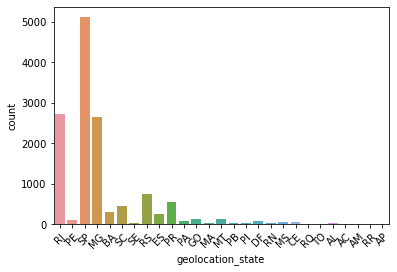

SP    5118
RJ    2734
MG    2648
RS     755
PR     557
SC     454
BA     305
ES     255
GO     130
MT     123
PE      99
DF      81
PA      78
MS      50
CE      48
MA      37
AL      30
PB      28
RN      24
PI      22
SE      21
RO      16
TO      13
AC       7
RR       5
AM       4
AP       3
Name: geolocation_state, dtype: int64
SP    0.375082
RJ    0.200366
MG    0.194064
RS    0.055332
PR    0.040821
SC    0.033272
BA    0.022353
ES    0.018688
GO    0.009527
MT    0.009014
PE    0.007255
DF    0.005936
PA    0.005716
MS    0.003664
CE    0.003518
MA    0.002712
AL    0.002199
PB    0.002052
RN    0.001759
PI    0.001612
SE    0.001539
RO    0.001173
TO    0.000953
AC    0.000513
RR    0.000366
AM    0.000293
AP    0.000220
Name: geolocation_state, dtype: float64
unique values:['RJ' 'PE' 'SP' 'MG' 'BA' 'SC' 'SE' 'RS' 'ES' 'PR' 'PA' 'GO' 'MA' 'MT'
 'PB' 'PI' 'DF' 'RN' 'MS' 'CE' 'RO' 'TO' 'AL' 'AC' 'AM' 'RR' 'AP']
unique values counts:27.
3
payment_type


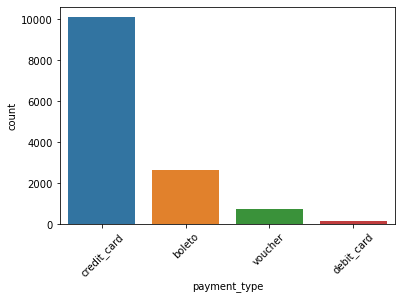

credit_card    10095
boleto          2633
voucher          739
debit_card       177
Name: payment_type, dtype: int64
credit_card    0.739886
boleto         0.192979
voucher        0.054163
debit_card     0.012973
Name: payment_type, dtype: float64
unique values:['credit_card' 'boleto' 'voucher' 'debit_card' nan]
unique values counts:5.
4
product_category_name


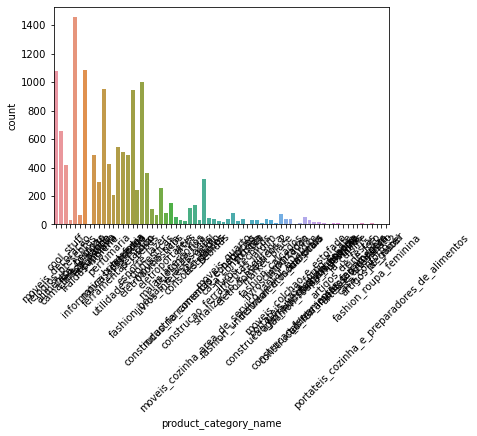

cama_mesa_banho                                  1455
beleza_saude                                     1086
moveis_decoracao                                 1077
esporte_lazer                                    1003
informatica_acessorios                            954
                                                 ... 
moveis_colchao_e_estofado                           4
fashion_roupa_feminina                              3
artigos_de_festas                                   3
portateis_cozinha_e_preparadores_de_alimentos       1
pc_gamer                                            1
Name: product_category_name, Length: 70, dtype: int64
cama_mesa_banho                                  0.108154
beleza_saude                                     0.080725
moveis_decoracao                                 0.080056
esporte_lazer                                    0.074556
informatica_acessorios                           0.070914
                                                   ...   
move

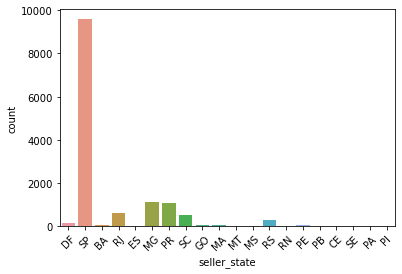

SP    9586
MG    1106
PR    1082
RJ     599
SC     542
RS     280
DF     133
GO      72
BA      65
PE      49
MA      46
ES      34
MT      23
MS       7
CE       7
PB       6
RN       4
SE       2
PA       1
PI       1
Name: seller_state, dtype: int64
SP    0.702528
MG    0.081055
PR    0.079296
RJ    0.043899
SC    0.039722
RS    0.020520
DF    0.009747
GO    0.005277
BA    0.004764
PE    0.003591
MA    0.003371
ES    0.002492
MT    0.001686
MS    0.000513
CE    0.000513
PB    0.000440
RN    0.000293
SE    0.000147
PA    0.000073
PI    0.000073
Name: seller_state, dtype: float64
unique values:['DF' 'SP' 'BA' 'RJ' 'ES' 'MG' 'PR' 'SC' 'GO' 'MA' 'MT' 'MS' 'RS' 'RN'
 'PE' 'PB' 'CE' 'SE' 'PA' 'PI']
unique values counts:20.
6
product_category_name_english


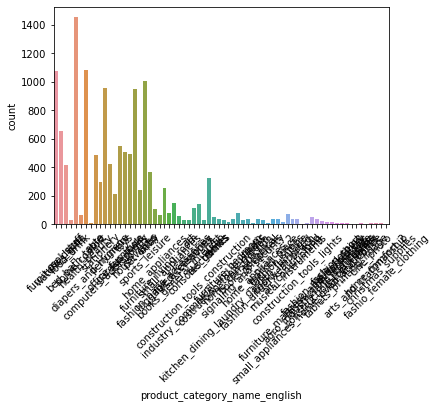

bed_bath_table                       1455
health_beauty                        1086
furniture_decor                      1077
sports_leisure                       1003
computers_accessories                 954
                                     ... 
la_cuisine                              4
arts_and_craftmanship                   4
furniture_mattress_and_upholstery       4
party_supplies                          3
fashio_female_clothing                  3
Name: product_category_name_english, Length: 68, dtype: int64
bed_bath_table                       0.108170
health_beauty                        0.080737
furniture_decor                      0.080068
sports_leisure                       0.074567
computers_accessories                0.070924
                                       ...   
la_cuisine                           0.000297
arts_and_craftmanship                0.000297
furniture_mattress_and_upholstery    0.000297
party_supplies                       0.000223
fashio_female_cl

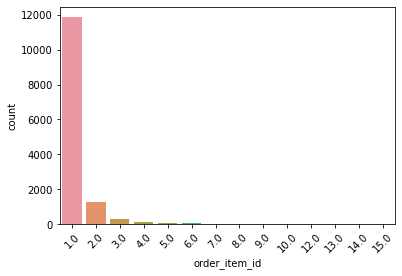

1.0     11879
2.0      1253
3.0       281
4.0       108
5.0        59
6.0        35
7.0         9
12.0        6
8.0         6
10.0        5
15.0        1
14.0        1
9.0         1
13.0        1
Name: order_item_id, dtype: int64
1.0     0.870575
2.0     0.091829
3.0     0.020594
4.0     0.007915
5.0     0.004324
6.0     0.002565
7.0     0.000660
12.0    0.000440
8.0     0.000440
10.0    0.000366
15.0    0.000073
14.0    0.000073
9.0     0.000073
13.0    0.000073
Name: order_item_id, dtype: float64
unique values:[ 1.  2. 10.  3.  5.  4.  6.  7. 12.  8. 15. 14.  9. 13.]
unique values counts:14.
8
payment_sequential


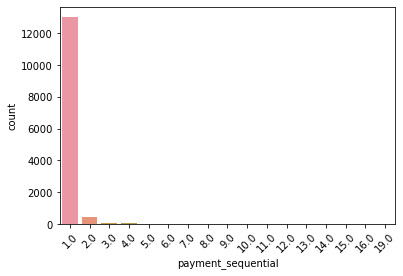

1.0     13025
2.0       410
3.0        79
4.0        41
6.0        23
5.0        23
8.0         9
10.0        7
9.0         6
7.0         6
11.0        4
14.0        3
12.0        3
16.0        2
19.0        1
15.0        1
13.0        1
Name: payment_sequential, dtype: int64
1.0     0.954632
2.0     0.030050
3.0     0.005790
4.0     0.003005
6.0     0.001686
5.0     0.001686
8.0     0.000660
10.0    0.000513
9.0     0.000440
7.0     0.000440
11.0    0.000293
14.0    0.000220
12.0    0.000220
16.0    0.000147
19.0    0.000073
15.0    0.000073
13.0    0.000073
Name: payment_sequential, dtype: float64
unique values:[ 1.  2. 10.  4.  7.  6.  3.  5.  9.  8. 19. 16. 15. 14. 12. 13. 11. nan]
unique values counts:18.
9
payment_installments


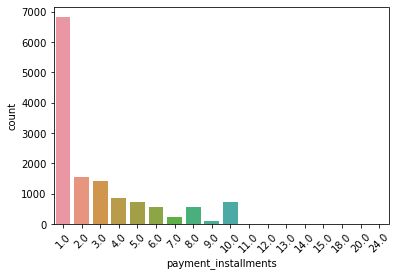

1.0     6826
2.0     1562
3.0     1428
4.0      872
10.0     728
5.0      721
6.0      573
8.0      570
7.0      231
9.0       90
12.0      15
15.0      10
18.0       6
24.0       4
13.0       2
11.0       2
20.0       2
14.0       2
Name: payment_installments, dtype: int64
1.0     0.500293
2.0     0.114483
3.0     0.104661
4.0     0.063911
10.0    0.053357
5.0     0.052844
6.0     0.041996
8.0     0.041777
7.0     0.016931
9.0     0.006596
12.0    0.001099
15.0    0.000733
18.0    0.000440
24.0    0.000293
13.0    0.000147
11.0    0.000147
20.0    0.000147
14.0    0.000147
Name: payment_installments, dtype: float64
unique values:[ 4. 10.  3.  5.  1.  8.  2.  6.  7. 24.  9. 12. 15. 13. 18. 11. 20. nan
 14.]
unique values counts:19.
10
product_photos_qty


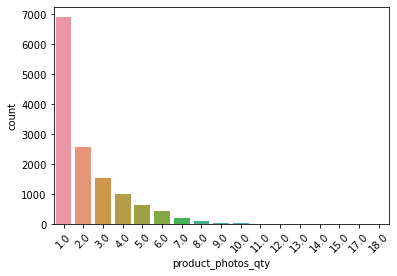

1.0     6911
2.0     2581
3.0     1527
4.0      997
5.0      632
6.0      438
7.0      184
8.0       85
10.0      37
9.0       35
12.0       8
11.0       7
13.0       4
15.0       3
14.0       2
17.0       1
18.0       1
Name: product_photos_qty, dtype: int64
1.0     0.513714
2.0     0.191853
3.0     0.113506
4.0     0.074110
5.0     0.046978
6.0     0.032558
7.0     0.013677
8.0     0.006318
10.0    0.002750
9.0     0.002602
12.0    0.000595
11.0    0.000520
13.0    0.000297
15.0    0.000223
14.0    0.000149
17.0    0.000074
18.0    0.000074
Name: product_photos_qty, dtype: float64
unique values:[ 1.  3.  2.  6.  4.  5.  8.  7. nan  9. 10. 13. 11. 15. 14. 17. 12. 18.]
unique values counts:18.


In [22]:
#Loop countplot setiap kolom dan menentukan jumlah kategori unik, daftar kategori unik dan value counts tiap kategori unik
number = 1
for col in md_cat_all.columns:
    print(number)
    print(col)
    sns.countplot(data = md_cat_all, x = col)
    plt.xticks(rotation=45)
    plt.show()
    print(md_cat_all[col].value_counts())
    print(md_cat_all[col].value_counts(normalize=True))
    print('unique values:{}'.format(md_cat_all[col].unique()))
    print('unique values counts:{}.'.format(len(md_cat_all[col].unique())))
    number += 1

1
geolocation_lat - geolocation_lng


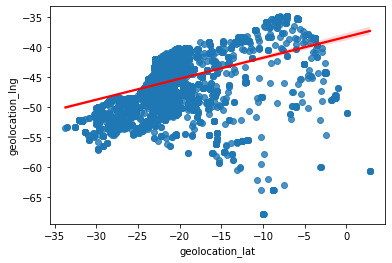

SpearmanrResult(correlation=0.43396598903819816, pvalue=0.0)
**************************************************
2
geolocation_lat - price


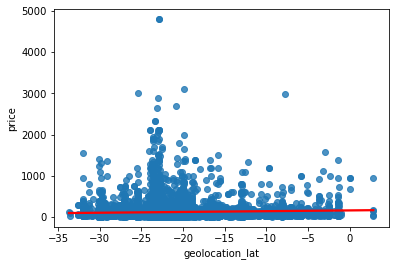

SpearmanrResult(correlation=0.04264811873377138, pvalue=6.240716784510534e-07)
**************************************************
3
geolocation_lat - freight_value


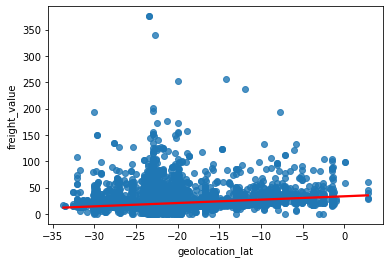

SpearmanrResult(correlation=0.24466567978978038, pvalue=3.7512424371281075e-185)
**************************************************
4
geolocation_lat - payment_value


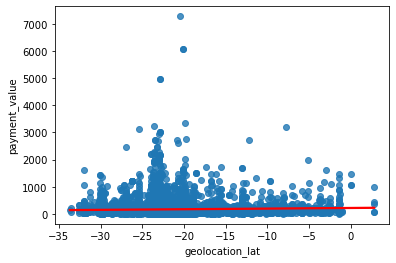

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
5
geolocation_lat - product_name_lenght


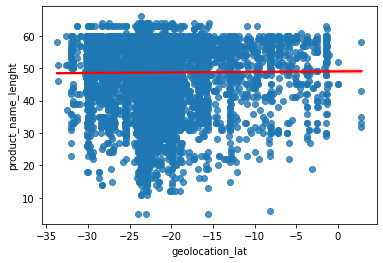

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
6
geolocation_lat - product_description_lenght


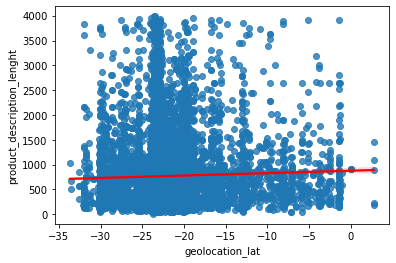

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
7
geolocation_lat - product_weight_g


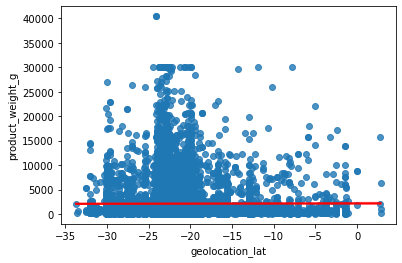

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
8
geolocation_lat - product_length_cm


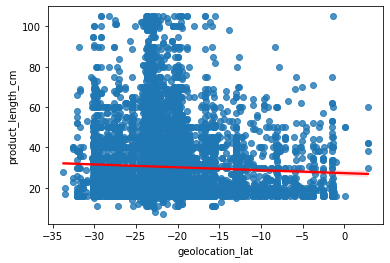

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
9
geolocation_lat - product_height_cm


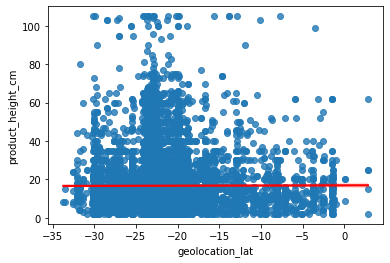

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
10
geolocation_lat - product_width_cm


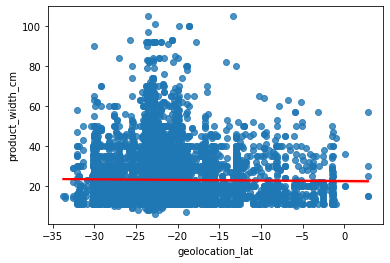

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
11
geolocation_lat - label


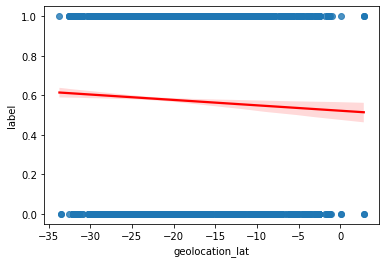

SpearmanrResult(correlation=-0.027818664587058593, pvalue=0.001154537614889279)
**************************************************
12
geolocation_lng - price


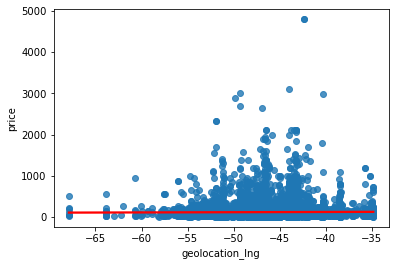

SpearmanrResult(correlation=0.021153907881185048, pvalue=0.013470701088547208)
**************************************************
13
geolocation_lng - freight_value


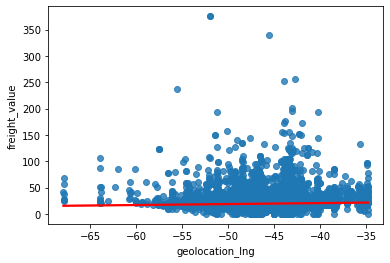

SpearmanrResult(correlation=0.14090702780655542, pvalue=1.8689531181510042e-61)
**************************************************
14
geolocation_lng - payment_value


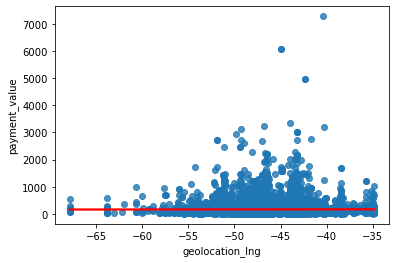

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
15
geolocation_lng - product_name_lenght


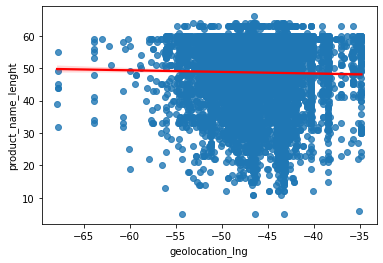

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
16
geolocation_lng - product_description_lenght


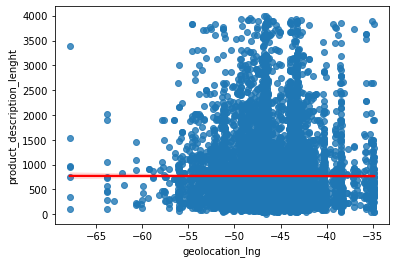

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
17
geolocation_lng - product_weight_g


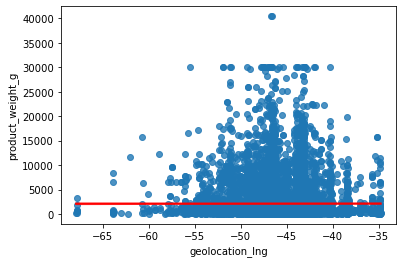

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
18
geolocation_lng - product_length_cm


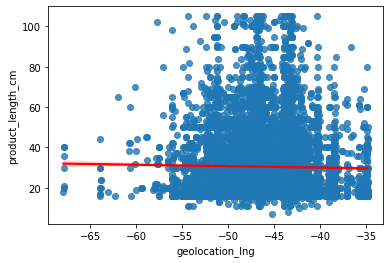

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
19
geolocation_lng - product_height_cm


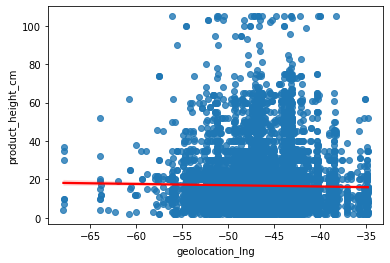

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
20
geolocation_lng - product_width_cm


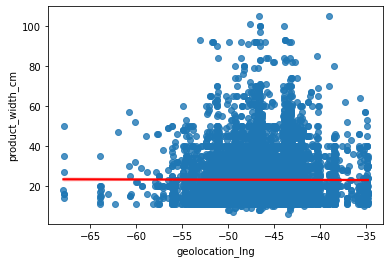

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
21
geolocation_lng - label


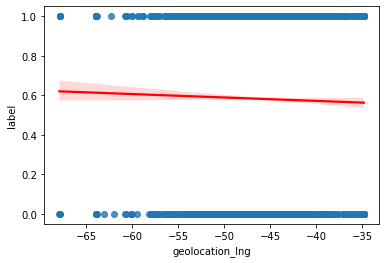

SpearmanrResult(correlation=-0.015225029085216253, pvalue=0.0753376230270133)
**************************************************
22
price - freight_value


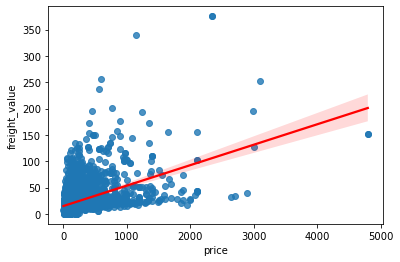

SpearmanrResult(correlation=0.43516466163465534, pvalue=0.0)
**************************************************
23
price - payment_value


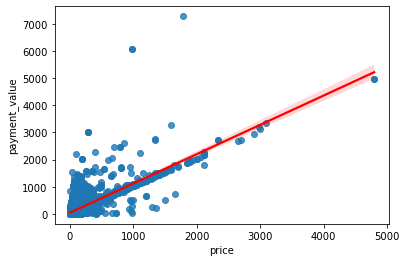

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
24
price - product_name_lenght


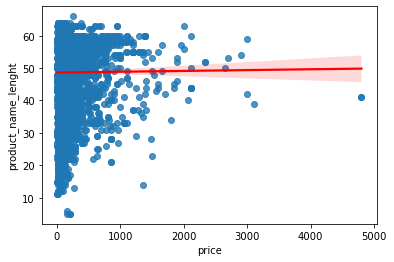

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
25
price - product_description_lenght


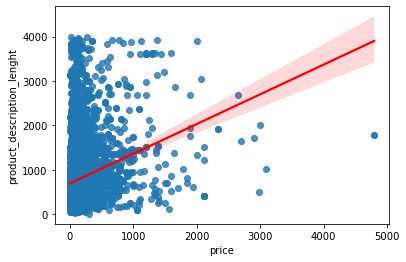

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
26
price - product_weight_g


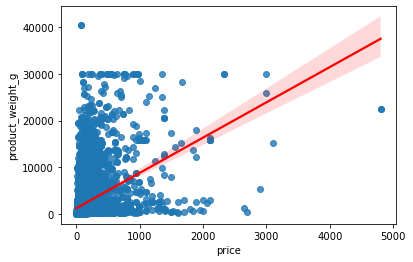

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
27
price - product_length_cm


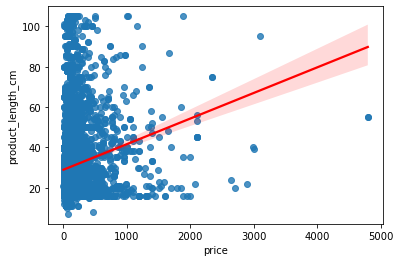

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
28
price - product_height_cm


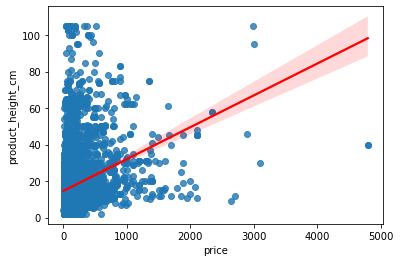

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
29
price - product_width_cm


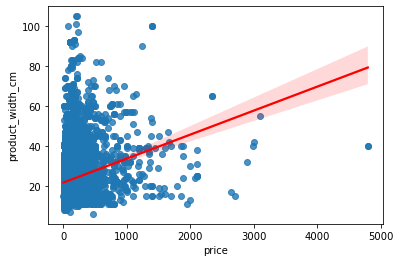

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
30
price - label


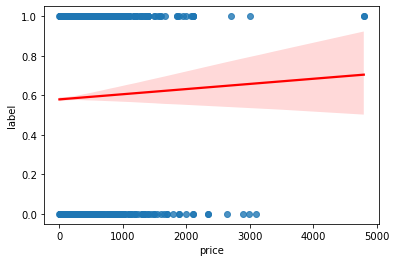

SpearmanrResult(correlation=0.004166626288968311, pvalue=0.6264931294491893)
**************************************************
31
freight_value - payment_value


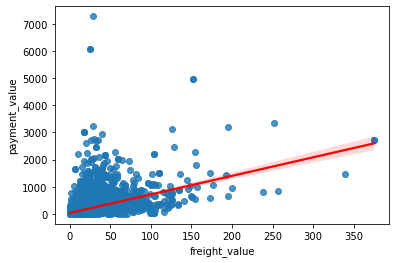

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
32
freight_value - product_name_lenght


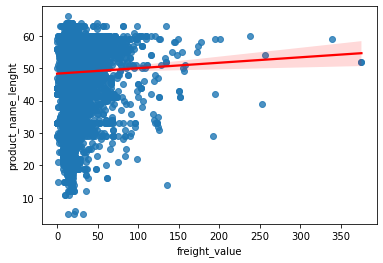

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
33
freight_value - product_description_lenght


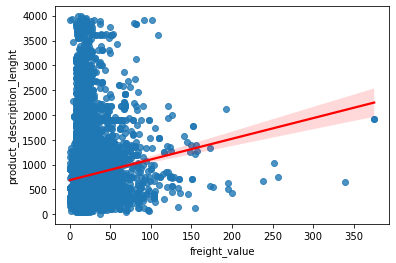

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
34
freight_value - product_weight_g


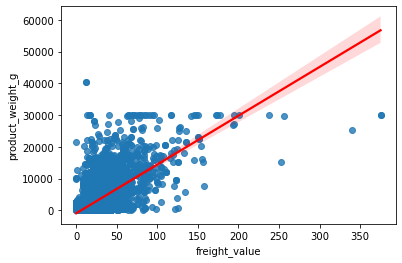

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
35
freight_value - product_length_cm


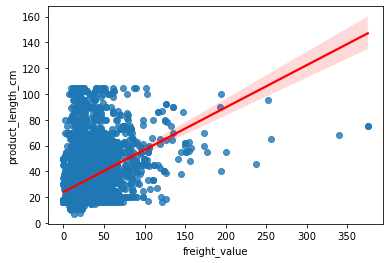

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
36
freight_value - product_height_cm


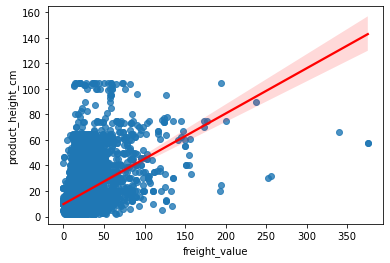

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
37
freight_value - product_width_cm


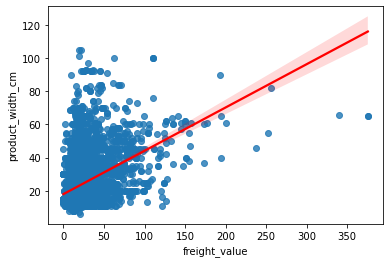

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
38
freight_value - label


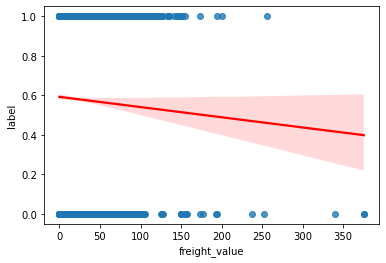

SpearmanrResult(correlation=-0.03400706134154623, pvalue=7.090995889529182e-05)
**************************************************
39
payment_value - product_name_lenght


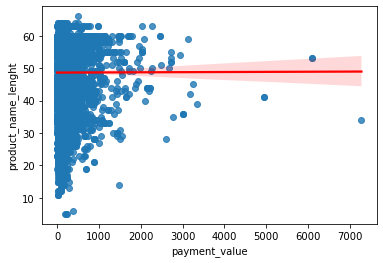

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
40
payment_value - product_description_lenght


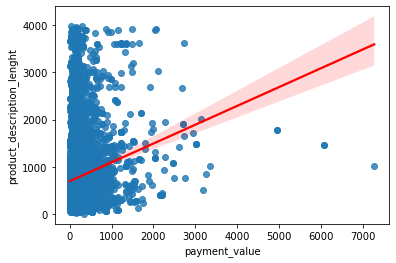

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
41
payment_value - product_weight_g


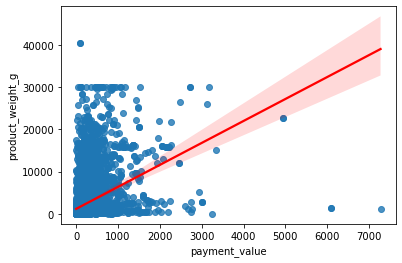

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
42
payment_value - product_length_cm


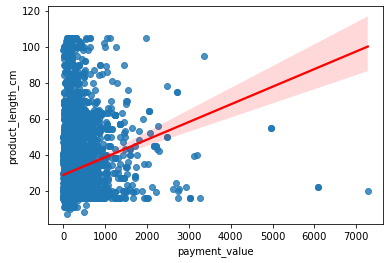

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
43
payment_value - product_height_cm


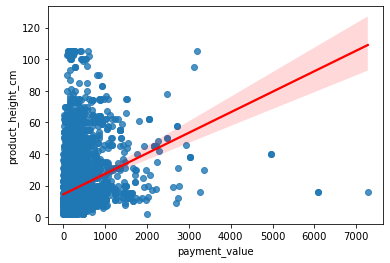

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
44
payment_value - product_width_cm


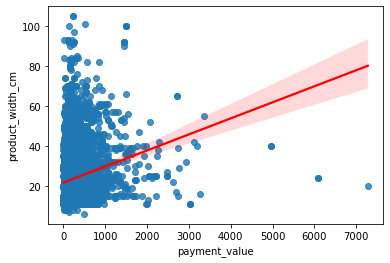

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
45
payment_value - label


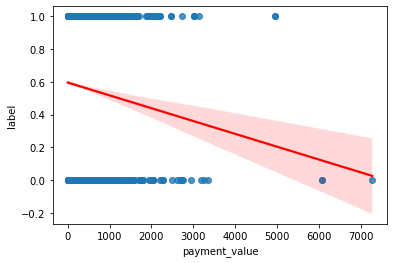

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
46
product_name_lenght - product_description_lenght


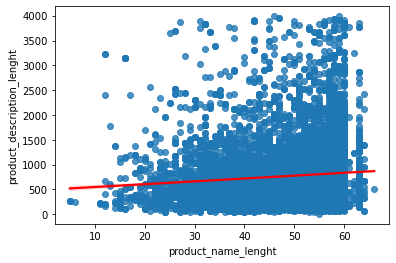

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
47
product_name_lenght - product_weight_g


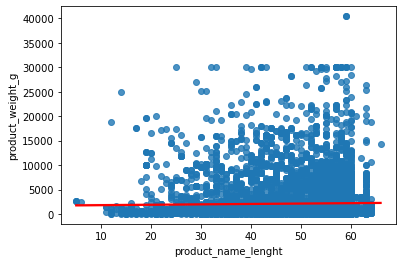

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
48
product_name_lenght - product_length_cm


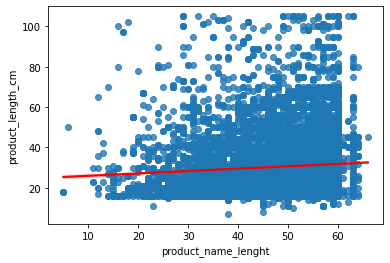

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
49
product_name_lenght - product_height_cm


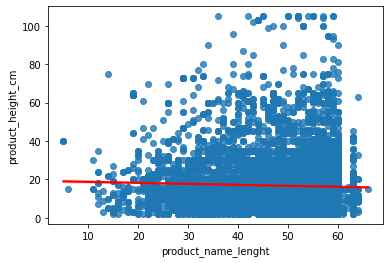

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
50
product_name_lenght - product_width_cm


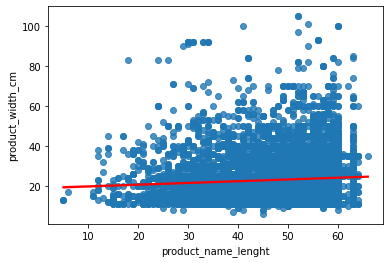

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
51
product_name_lenght - label


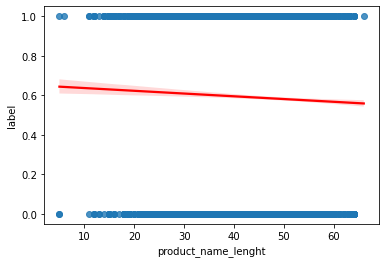

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
52
product_description_lenght - product_weight_g


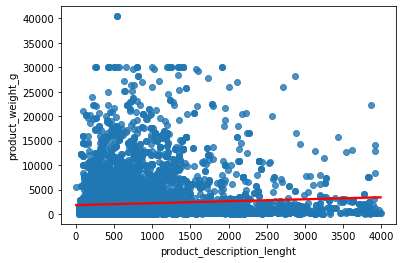

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
53
product_description_lenght - product_length_cm


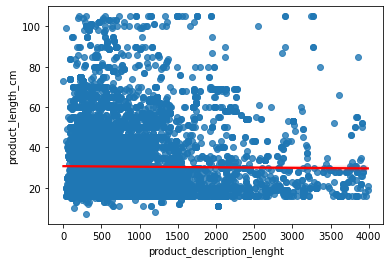

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
54
product_description_lenght - product_height_cm


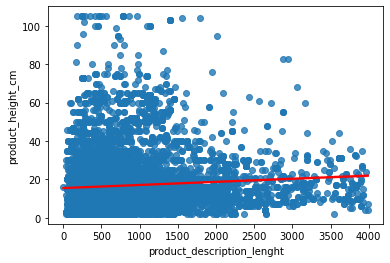

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
55
product_description_lenght - product_width_cm


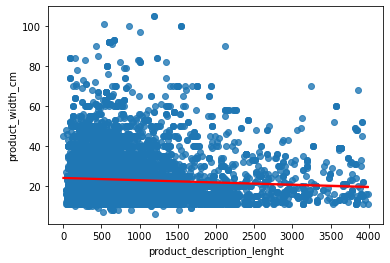

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
56
product_description_lenght - label


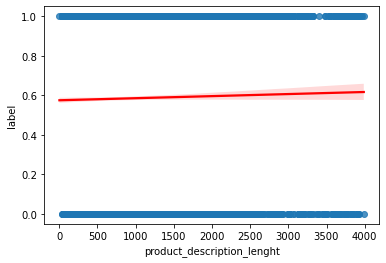

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
57
product_weight_g - product_length_cm


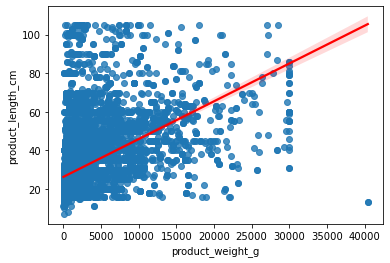

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
58
product_weight_g - product_height_cm


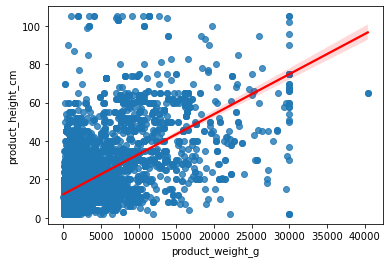

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
59
product_weight_g - product_width_cm


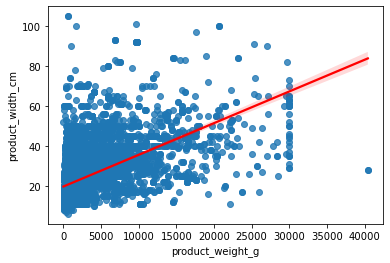

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
60
product_weight_g - label


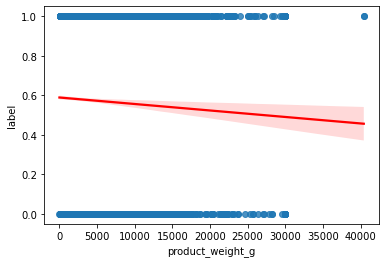

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
61
product_length_cm - product_height_cm


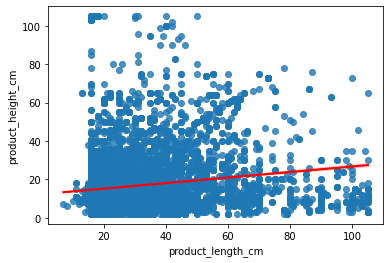

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
62
product_length_cm - product_width_cm


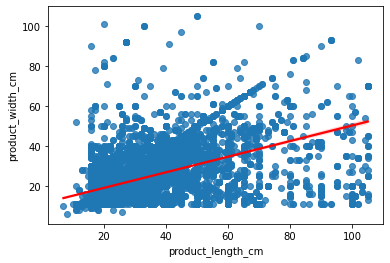

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
63
product_length_cm - label


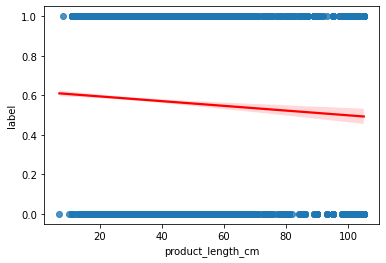

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
64
product_height_cm - product_width_cm


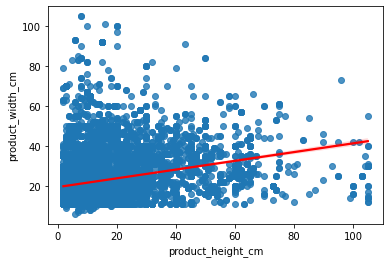

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
65
product_height_cm - label


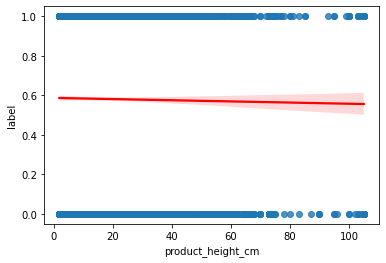

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************
66
product_width_cm - label


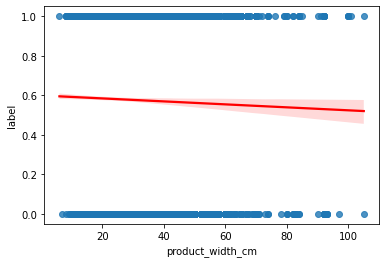

SpearmanrResult(correlation=nan, pvalue=nan)
**************************************************


In [23]:
start = time.time()
done = []
number = 1


for x in md_num.columns:
    for y in md_num.columns:
        if x != y:
            if [y,x] not in done:
                print(number)
                print('{} - {}'.format(x,y))
                
                # Membuat regplot
                sns.regplot(data= md_num, x=x, y=y, line_kws = {'color':'red'})
                plt.show()
                
                #Melakukan normal test
                stats, pvalue = normaltest(md_num[x])
                stats2, pvalue2 = normaltest(md_num[y])
                # apabila kedua fitur normal gunakan pearson, apabila tidak gunakan spearman
                if pvalue > 0.05:
                    if pvalue2 > 0.05:
                        print(pearsonr(md_num[x], md_num[y]))
                else:
                    print(spearmanr(md_num[x], md_num[y]))
                
                print('*' * 50)
                number += 1
                done.append([x,y])
                
end = time.time()

### Multivariat EDA

1


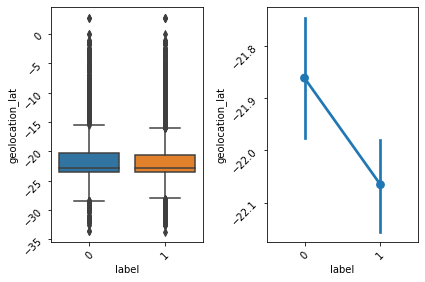

Confidence interval 95% untuk fitur geolocation_lat pada customer yang memberikan rating 5 adalah (-22.156020606775826, -21.975415644287295)
Confidence interval 95% untuk fitur geolocation_lat pada customer yang memberikan rating dibawah 5 adalah  (-21.97770473390203, -21.74568950939686)
Reject null hypothesis, H(1): mean variabel numerik customer yang memberikan rating 5  ≠ mean variabel numerik kelompok customer yang memberikan rating dibawah 5 
**************************************************
2


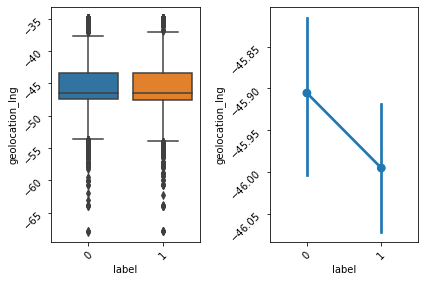

Confidence interval 95% untuk fitur geolocation_lng pada customer yang memberikan rating 5 adalah (-46.07205451931415, -45.918299239147714)
Confidence interval 95% untuk fitur geolocation_lng pada customer yang memberikan rating dibawah 5 adalah  (-45.999490848919294, -45.81154170202666)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
3


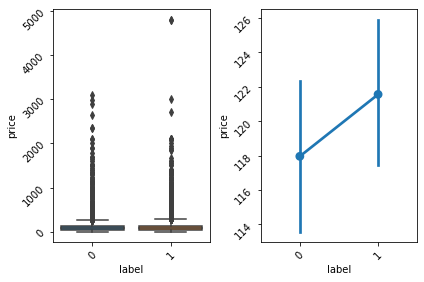

Confidence interval 95% untuk fitur price pada customer yang memberikan rating 5 adalah (117.44192512479442, 125.66880830080224)
Confidence interval 95% untuk fitur price pada customer yang memberikan rating dibawah 5 adalah  (113.34125387271345, 122.57495048122519)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
4


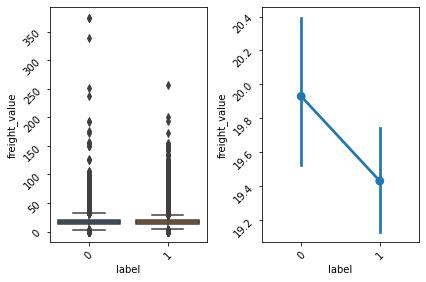

Confidence interval 95% untuk fitur freight_value pada customer yang memberikan rating 5 adalah (19.108555044244632, 19.748730148861853)
Confidence interval 95% untuk fitur freight_value pada customer yang memberikan rating dibawah 5 adalah  (19.50336276651533, 20.354144255956676)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
5


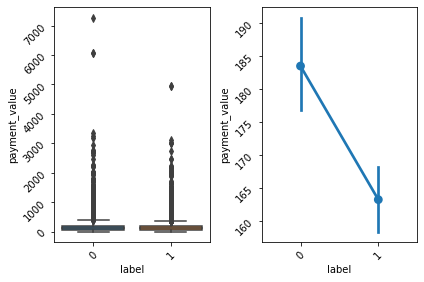

Confidence interval 95% untuk fitur payment_value pada customer yang memberikan rating 5 adalah (158.28195891691507, 168.13376129946346)
Confidence interval 95% untuk fitur payment_value pada customer yang memberikan rating dibawah 5 adalah  (176.08629221966274, 190.83240137120598)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
6


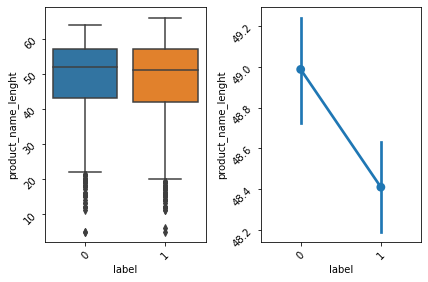

Confidence interval 95% untuk fitur product_name_lenght pada customer yang memberikan rating 5 adalah (48.186713118000874, 48.63275433008169)
Confidence interval 95% untuk fitur product_name_lenght pada customer yang memberikan rating dibawah 5 adalah  (48.73044744593001, 49.24421351052966)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
7


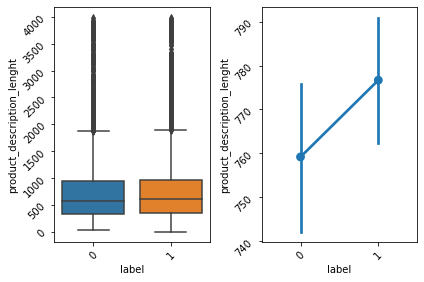

Confidence interval 95% untuk fitur product_description_lenght pada customer yang memberikan rating 5 adalah (762.5461667062569, 790.7882708017058)
Confidence interval 95% untuk fitur product_description_lenght pada customer yang memberikan rating dibawah 5 adalah  (742.8797930295353, 775.5263454429843)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
8


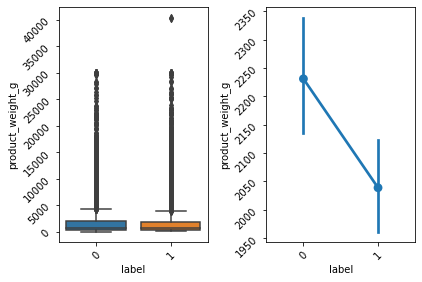

Confidence interval 95% untuk fitur product_weight_g pada customer yang memberikan rating 5 adalah (1957.7417238247353, 2119.5148219960097)
Confidence interval 95% untuk fitur product_weight_g pada customer yang memberikan rating dibawah 5 adalah  (2129.426467745555, 2331.998742928602)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
9


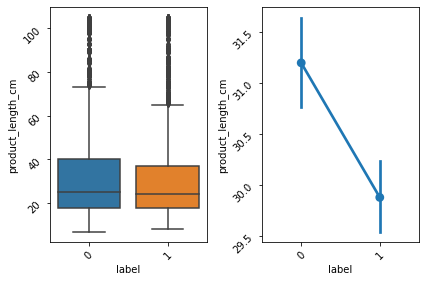

Confidence interval 95% untuk fitur product_length_cm pada customer yang memberikan rating 5 adalah (29.52853107592093, 30.226755933142513)
Confidence interval 95% untuk fitur product_length_cm pada customer yang memberikan rating dibawah 5 adalah  (30.755440119513846, 31.643085161385027)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
10


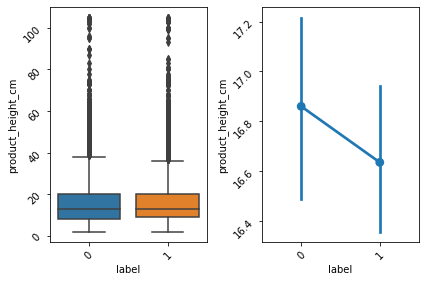

Confidence interval 95% untuk fitur product_height_cm pada customer yang memberikan rating 5 adalah (16.34472278141861, 16.925669967826103)
Confidence interval 95% untuk fitur product_height_cm pada customer yang memberikan rating dibawah 5 adalah  (16.4923251097931, 17.227127137397915)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
11


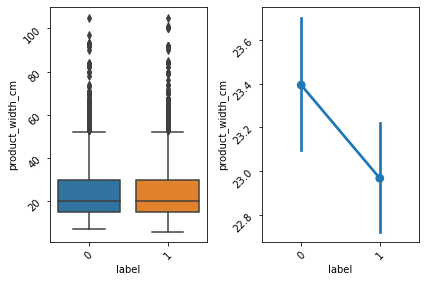

Confidence interval 95% untuk fitur product_width_cm pada customer yang memberikan rating 5 adalah (22.71239312769129, 23.22139337784748)
Confidence interval 95% untuk fitur product_width_cm pada customer yang memberikan rating dibawah 5 adalah  (23.082564509063058, 23.703952344869524)
Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 
**************************************************
12


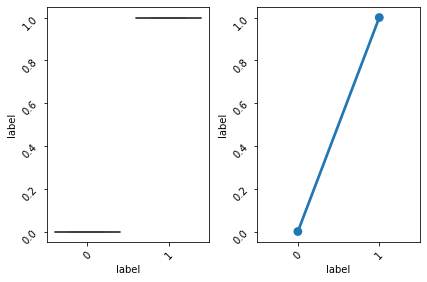

Confidence interval 95% untuk fitur label pada customer yang memberikan rating 5 adalah (nan, nan)
Confidence interval 95% untuk fitur label pada customer yang memberikan rating dibawah 5 adalah  (nan, nan)
Reject null hypothesis, H(1): mean variabel numerik customer yang memberikan rating 5  ≠ mean variabel numerik kelompok customer yang memberikan rating dibawah 5 
**************************************************


In [24]:
n_nonfive = len(md[md['label'] ==0])
n_five = len(md[md['label'] ==1])
number = 1
for col in md_num.columns:
    print(number)
    fig, ax = plt.subplots(1,2)
    
    # buat boxplot
    sns.boxplot(data = md, x='label', y=col, ax=ax[0])
    
    # buat pointplot
    sns.pointplot(data = md, x='label', y=col, ax=ax[1])
    
    plt.tight_layout()
    ax[0].tick_params(rotation=45)
    ax[1].tick_params(rotation=45)
    plt.show()
    
    # confidence interval attrited employee

    ci1 = t.interval(alpha = 0.95,
                    df = len(md[md['label'] ==1]) - 1,
                    loc = md[md['label'] ==1][col].mean(), 
                    scale = md[md['label'] ==1][col].std()/(n_five**(1/2)))
    
    print('Confidence interval 95% untuk fitur {} pada customer yang memberikan rating 5 adalah {}'.format(col, ci1))
    
    # confidence interval non-attrited employee
    
    ci2 = t.interval(alpha = 0.95,
                    df = len(md[md['label'] ==0]) - 1,
                    loc = md[md['label'] ==0][col].mean(), 
                    scale = md[md['label'] ==0][col].std()/(n_nonfive**(1/2)))
    
    print('Confidence interval 95% untuk fitur {} pada customer yang memberikan rating dibawah 5 adalah  {}'.format(col, ci2))
    
    # ind ttest
    
    stat, pvalue = ttest_ind(md[md['label'] ==1][col],
                             md[md['label'] ==0][col])
    
    if pvalue < 0.05:
        print('Reject null hypothesis, H(1): mean variabel numerik customer yang memberikan rating 5  ≠ mean variabel numerik kelompok customer yang memberikan rating dibawah 5 ')
    else:
        print('Fail to reject null hypothesis, maka H(0): mean variabel numerik customer yang memberikan rating 5 = mean variabel numerik customer yang memberikan rating dibawah 5 ')
    print('*'*50)
    number += 1
    

customer_state


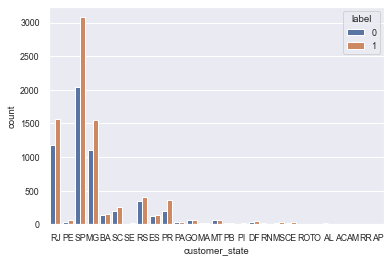

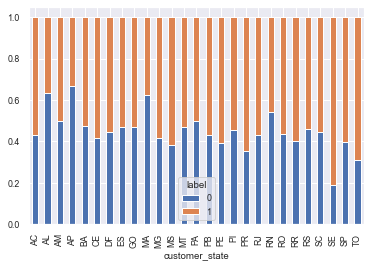

geolocation_state


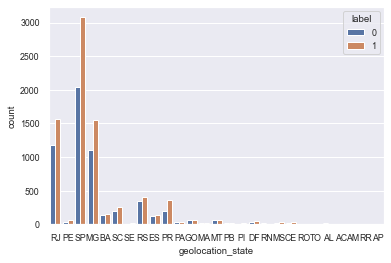

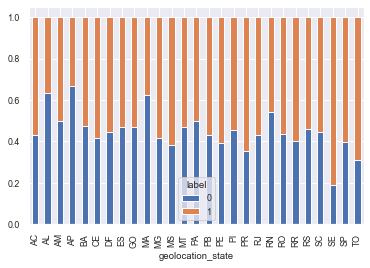

payment_type


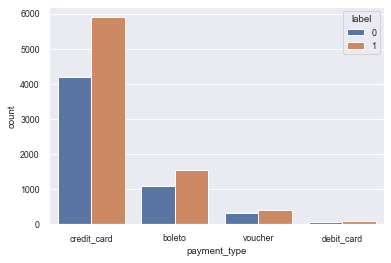

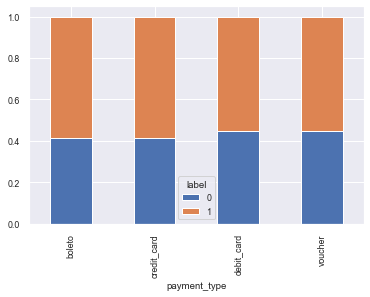

product_category_name


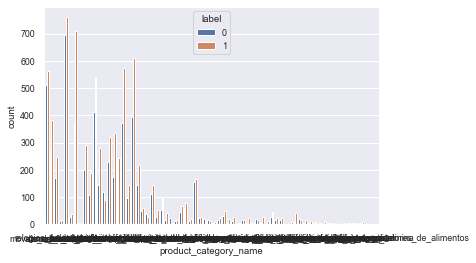

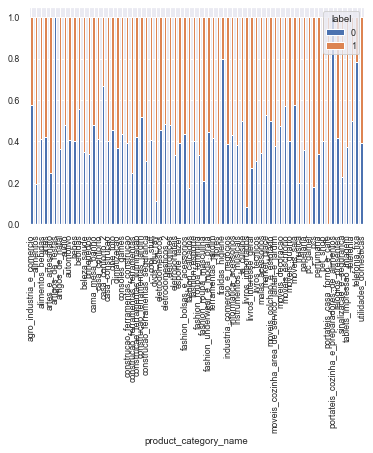

seller_state


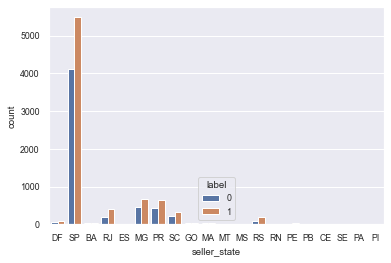

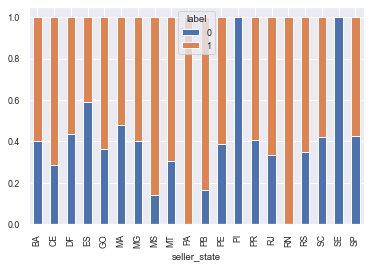

product_category_name_english


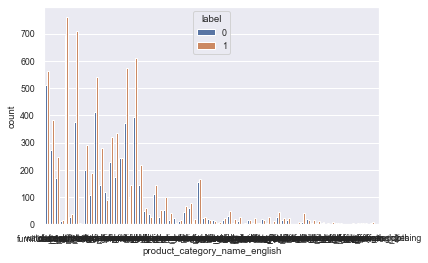

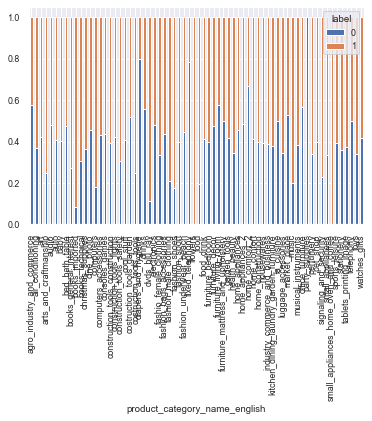

order_item_id


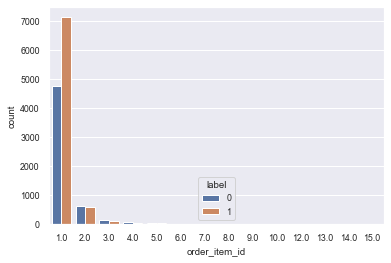

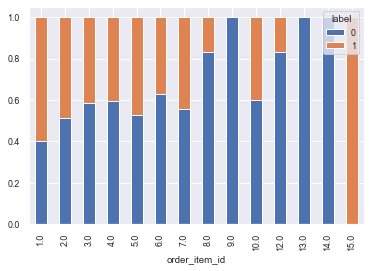

payment_sequential


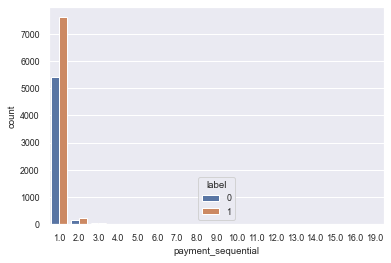

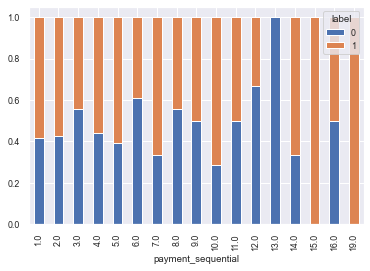

payment_installments


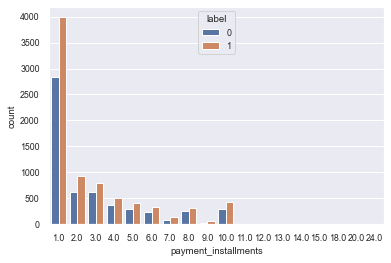

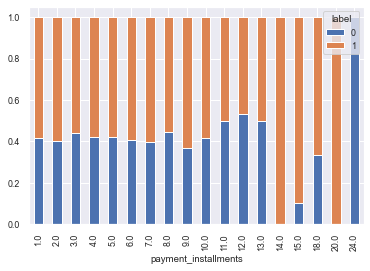

product_photos_qty


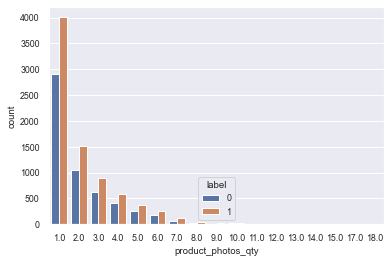

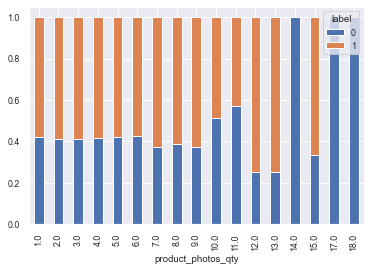

In [25]:
for col in md_cat_all.columns:
    #buat countplot dengan hue
    if col != 'label':
        print(col)
        sns.set(font_scale=0.8)
        sns.countplot(data = md, x=col, hue='label')
        plt.show()

        #buat stacked barplot
        ct = pd.crosstab(index = md[col], columns = md['label'], normalize='index')
        ct.plot(kind='bar', stacked=True)
        plt.show()

## Data Preparation

In [26]:
# Splitting
X = md.drop(['label'], axis=1)
y = md['label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [28]:
for data in X_train, X_test, y_train ,y_test:
    data.reset_index(drop=True, inplace=True)

In [29]:
#Memastikan y_train dan y_test memiliki ratio yang sama
y_train.value_counts(normalize=True)

1    0.582539
0    0.417461
Name: label, dtype: float64

In [30]:
#Memastikan y_train dan y_test memiliki ratio yang sama
y_test.value_counts(normalize=True)

1    0.582631
0    0.417369
Name: label, dtype: float64

## Missing Value

### Training Set Missing Value

In [38]:
X_train.isna().sum()/len(X_train)*100

customer_state                   0.000000
geolocation_lat                  0.000000
geolocation_lng                  0.000000
geolocation_state                0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.027483
order_delivered_carrier_date     0.000000
order_delivered_customer_date    0.000000
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
payment_sequential               0.009161
payment_type                     0.009161
payment_installments             0.009161
payment_value                    0.009161
product_category_name            1.410773
product_name_lenght              1.410773
product_description_lenght       1.410773
product_photos_qty               1.410773
product_weight_g                 0.036643
product_length_cm                0.036643
product_height_cm                0

In [39]:
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

In [40]:
X_train['payment_value'] = median_imputer.fit_transform(X_train[['payment_value']])
X_train['product_name_lenght'] = median_imputer.fit_transform(X_train[['product_name_lenght']])
X_train['product_description_lenght'] = median_imputer.fit_transform(X_train[['product_description_lenght']])
X_train['product_weight_g'] = median_imputer.fit_transform(X_train[['product_weight_g']])
X_train['product_length_cm'] = median_imputer.fit_transform(X_train[['product_length_cm']]) 
X_train['product_height_cm'] = median_imputer.fit_transform(X_train[['product_height_cm']])
X_train['product_width_cm'] = median_imputer.fit_transform(X_train[['product_width_cm']])
X_train['product_photos_qty'] = median_imputer.fit_transform(X_train[['product_photos_qty']])
X_train['payment_sequential'] = mode_imputer.fit_transform(X_train[['payment_sequential']])
X_train['payment_type'] = mode_imputer.fit_transform(X_train[['payment_type']])
X_train['payment_installments'] = mode_imputer.fit_transform(X_train[['payment_installments']])
X_train['product_category_name'] = mode_imputer.fit_transform(X_train[['product_category_name']])
X_train['product_category_name_english'] = mode_imputer.fit_transform(X_train[['product_category_name_english']]) 
X_train['order_approved_at'] = mode_imputer.fit_transform(X_train[['order_approved_at']])
# Fitting for backtesting_model
X_train['geolocation_lat'] = median_imputer.fit_transform(X_train[['geolocation_lat']])
X_train['geolocation_lng'] = median_imputer.fit_transform(X_train[['geolocation_lng']])
X_train['geolocation_state'] = mode_imputer.fit_transform(X_train[['geolocation_state']])
X_train['order_delivered_customer_date'] = mode_imputer.fit_transform(X_train[['order_delivered_customer_date']])

In [41]:
X_train.isna().sum()

customer_state                   0
geolocation_lat                  0
geolocation_lng                  0
geolocation_state                0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_state                     0
product_category_name_english    0
dtype: int64

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10916 entries, 0 to 10915
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_state                 10916 non-null  object 
 1   geolocation_lat                10916 non-null  float64
 2   geolocation_lng                10916 non-null  float64
 3   geolocation_state              10916 non-null  object 
 4   order_purchase_timestamp       10916 non-null  object 
 5   order_approved_at              10916 non-null  object 
 6   order_delivered_carrier_date   10916 non-null  object 
 7   order_delivered_customer_date  10916 non-null  object 
 8   order_estimated_delivery_date  10916 non-null  object 
 9   order_item_id                  10916 non-null  float64
 10  shipping_limit_date            10916 non-null  object 
 11  price                          10916 non-null  float64
 12  freight_value                  10916 non-null 

### Testing Set Missing Value

In [43]:
X_test.isna().sum()

customer_state                    0
geolocation_lat                   0
geolocation_lng                   0
geolocation_state                 0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
order_item_id                     0
shipping_limit_date               0
price                             0
freight_value                     0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
product_category_name            38
product_name_lenght              38
product_description_lenght       38
product_photos_qty               38
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
seller_state                      0
product_category_name_english    40
dtype: int64

In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_state                 2729 non-null   object 
 1   geolocation_lat                2729 non-null   float64
 2   geolocation_lng                2729 non-null   float64
 3   geolocation_state              2729 non-null   object 
 4   order_purchase_timestamp       2729 non-null   object 
 5   order_approved_at              2729 non-null   object 
 6   order_delivered_carrier_date   2729 non-null   object 
 7   order_delivered_customer_date  2729 non-null   object 
 8   order_estimated_delivery_date  2729 non-null   object 
 9   order_item_id                  2729 non-null   float64
 10  shipping_limit_date            2729 non-null   object 
 11  price                          2729 non-null   float64
 12  freight_value                  2729 non-null   f

In [45]:
X_test['product_name_lenght'] = median_imputer.transform(X_test[['product_name_lenght']])
X_test['product_description_lenght'] = median_imputer.transform(X_test[['product_description_lenght']])
X_test['product_weight_g'] = median_imputer.transform(X_test[['product_weight_g']])
X_test['product_length_cm'] = median_imputer.transform(X_test[['product_length_cm']]) 
X_test['product_height_cm'] = median_imputer.transform(X_test[['product_height_cm']])
X_test['product_width_cm'] = median_imputer.transform(X_test[['product_width_cm']])       
X_test['product_photos_qty'] = median_imputer.transform(X_test[['product_photos_qty']])
X_test['product_category_name'] = mode_imputer.transform(X_test[['product_category_name']])
X_test['product_category_name_english'] = mode_imputer.transform(X_test[['product_category_name_english']]) 

In [46]:
X_test.isna().sum()

customer_state                   0
geolocation_lat                  0
geolocation_lng                  0
geolocation_state                0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_state                     0
product_category_name_english    0
dtype: int64

In [47]:
data_date=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date']
X_train[data_date]=X_train[data_date].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d %H:%M:%S'))
X_test[data_date]=X_test[data_date].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d %H:%M:%S'))

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2729 entries, 0 to 2728
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_state                 2729 non-null   object        
 1   geolocation_lat                2729 non-null   float64       
 2   geolocation_lng                2729 non-null   float64       
 3   geolocation_state              2729 non-null   object        
 4   order_purchase_timestamp       2729 non-null   datetime64[ns]
 5   order_approved_at              2729 non-null   datetime64[ns]
 6   order_delivered_carrier_date   2729 non-null   datetime64[ns]
 7   order_delivered_customer_date  2729 non-null   datetime64[ns]
 8   order_estimated_delivery_date  2729 non-null   datetime64[ns]
 9   order_item_id                  2729 non-null   float64       
 10  shipping_limit_date            2729 non-null   datetime64[ns]
 11  price            

# Feature Engineering

## Feature Transformation

### Training Set

In [49]:
#Pseudo numerik
pseudo_num = ['order_item_id', 'payment_sequential', 'payment_installments','product_photos_qty']
number = list(X_train.select_dtypes('number').columns)
for x in pseudo_num:
    number.remove(x)

In [50]:
cat=X_train.select_dtypes('object').columns

In [51]:
X_train_num = X_train[number]
minmax = MinMaxScaler()
X_train_scl = pd.DataFrame(minmax.fit_transform(X_train_num), columns=number)

In [52]:
X_train_cat = X_train[cat]
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat).toarray(), columns=ohe.get_feature_names_out(cat))

In [53]:
X_train_ps = X_train[pseudo_num]

In [54]:
X_train_date=X_train[data_date]

In [55]:
X_train_transformed = pd.concat([X_train_scl, X_train_ohe, X_train_ps, X_train_date],axis=1)

In [56]:
X_train_date

order_purchase_timestamp   order_approved_at  \
0          2017-08-25 18:09:40 2017-08-25 18:26:14   
1          2018-06-26 20:41:56 2018-06-26 20:55:23   
2          2018-02-18 00:10:50 2018-02-18 00:26:32   
3          2017-11-03 08:43:08 2017-11-03 08:50:24   
4          2018-02-07 14:53:56 2018-02-07 15:11:13   
...                        ...                 ...   
10911      2017-10-16 12:38:07 2017-10-17 04:06:09   
10912      2017-07-03 14:03:34 2017-07-03 14:15:15   
10913      2018-07-19 14:09:38 2018-07-19 14:23:00   
10914      2018-04-28 16:37:31 2018-04-28 16:53:29   
10915      2017-10-01 13:28:07 2017-10-01 13:49:47   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-09-13 19:13:05           2017-09-19 22:05:52   
1              2018-06-27 11:10:00           2018-06-29 19:06:45   
2              2018-02-20 23:25:12           2018-02-27 17:28:30   
3              2017-11-03 19:29:01           2017-11-08 22:20:59   
4              2018-02-15 20:53:20           2018-02-23 00:25:23   
...                            ...                           ...   
10911          2017-10-20 18:57:42           2017-10-27 17:33:49   
10912          2017-07-04 13:37:29           2017-07-11 17:07:42   
10913          2018-07-23 14:11:00           2018-07-26 18:58:41   
10914          2018-04-30 12:42:00           2018-05-04 20:44:30   
10915          2017-10-04 19:36:12           2017-10-16 19:33:57   

      order_estimated_delivery_date shipping_limit_date  
0                        2017-09-29 2017-09-13 18:26:14  
1                        2018-07-12 2018-07-02 20:55:23  
2                        2018-03-12 2018-02-22 00:26:32  
3                        2017-11-28 2017-11-09 08:50:24  
4                        2018-03-13 2018-02-13 15:11:13  
...                             ...                 ...  
10911                    2017-11-03 2017-10-23 04:06:09  
10912                    2017-07-26 2017-07-10 14:15:15  
10913                    2018-08-03 2018-07-24 14:23:00  
10914                    2018-05-22 2018-05-04 16:53:29  
10915                    2017-10-26 2017-10-05 13:49:47  

[10916 rows x 6 columns]

### Feature Extraction

In [57]:
X_train_transformed['purchase_to_approved']=X_train_transformed['order_approved_at']-X_train_transformed['order_purchase_timestamp']
X_train_transformed['approved_to_delivered_carrier']=X_train_transformed['order_delivered_carrier_date']-X_train_transformed['order_approved_at']
X_train_transformed['delivered_carrier_to_delivered_customer']=X_train_transformed['order_delivered_customer_date']-X_train_transformed['order_delivered_carrier_date']
X_train_transformed['purchase_to_delivered_customer']=X_train_transformed['order_delivered_carrier_date']-X_train_transformed['order_purchase_timestamp']

In [58]:
data_date2=['purchase_to_approved','approved_to_delivered_carrier','delivered_carrier_to_delivered_customer','purchase_to_delivered_customer']

In [59]:
X_train_transformed

geolocation_lat  geolocation_lng     price  freight_value  \
0             0.294407         0.741467  0.002647       0.037572   
1             0.276614         0.639897  0.037142       0.022703   
2             0.376579         0.724486  0.016422       0.053427   
3             0.305790         0.784342  0.031221       0.042129   
4             0.100364         0.505035  0.015361       0.040690   
...                ...              ...       ...            ...   
10911         0.354448         0.756110  0.009317       0.042928   
10912         0.293940         0.746580  0.011005       0.043008   
10913         0.310796         0.569296  0.039331       0.037279   
10914         0.276734         0.639572  0.026825       0.053960   
10915         0.404693         0.592626  0.012235       0.047085   

       payment_value  product_name_lenght  product_description_lenght  \
0           0.002257             0.360656                    0.151972   
1           0.025830             0.868852                    0.465210   
2           0.013750             0.819672                    0.350666   
3           0.022927             0.868852                    0.271037   
4           0.012393             0.459016                    0.063301   
...              ...                  ...                         ...   
10911       0.008522             0.540984                    0.183622   
10912       0.009640             0.688525                    0.173072   
10913       0.028025             0.639344                    0.077870   
10914       0.019621             0.852459                    0.327305   
10915       0.021324             0.852459                    0.090932   

       product_weight_g  product_length_cm  product_height_cm  \
0              0.004898           0.102041           0.038835   
1              0.009425           0.122449           0.097087   
2              0.061797           0.438776           0.077670   
3              0.009425           0.153061           0.116505   
4              0.004403           0.102041           0.077670   
...                 ...                ...                ...   
10911          0.019741           0.132653           0.174757   
10912          0.010464           0.132653           0.174757   
10913          0.007372           0.204082           0.067961   
10914          0.107563           0.132653           0.174757   
10915          0.040769           0.234694           0.194175   

       product_width_cm  customer_state_AC  customer_state_AL  \
0              0.060606                0.0                0.0   
1              0.101010                0.0                0.0   
2              0.343434                0.0                0.0   
3              0.111111                0.0                0.0   
4              0.070707                0.0                0.0   
...                 ...                ...                ...   
10911          0.141414                0.0                0.0   
10912          0.141414                0.0                0.0   
10913          0.131313                0.0                0.0   
10914          0.141414                0.0                0.0   
10915          0.242424                0.0                0.0   

       customer_state_AM  customer_state_AP  customer_state_BA  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
10911                0.0                0.0                0.0   
10912                0.0                0.0                0.0   
10913                0.0                0.0                0.0   
10914                0.0                0.0                0.0   
10915                0.0 

In [60]:
X_train_transformed['order_approved_at']-X_train_transformed['order_purchase_timestamp']

0       0 days 00:16:34
1       0 days 00:13:27
2       0 days 00:15:42
3       0 days 00:07:16
4       0 days 00:17:17
              ...      
10911   0 days 15:28:02
10912   0 days 00:11:41
10913   0 days 00:13:22
10914   0 days 00:15:58
10915   0 days 00:21:40
Length: 10916, dtype: timedelta64[ns]

In [61]:
def break_date(x_t,date):
    for i in date:
        s_year='_year'
        s_month='_month'
        s_week='_week'
        s_day='_day'
        s_hour='_hour'
        s_minute='_minute'
        s_dayofweek='_dayofweek'
        
        x_t[i+s_year]=x_t[i].dt.year
        x_t[i+s_month]=x_t[i].dt.month
        x_t[i+s_week]=x_t[i].dt.week
        x_t[i+s_day]=x_t[i].dt.day
        x_t[i+s_hour]=x_t[i].dt.hour
        x_t[i+s_minute]=x_t[i].dt.minute
        x_t[i+s_dayofweek]=x_t[i].dt.dayofweek
        
    return(x_t)

In [62]:
def break_date2(x_t,date):
    for i in date:
        s_day='_days'
        s_seconds='_seconds'
        s_seconds='_seconds'

        x_t[i+s_day]=x_t[i].dt.days
        x_t[i+s_seconds]=x_t[i].dt.seconds
        
    return(x_t)

In [63]:
break_date(X_train_transformed,data_date)

geolocation_lat  geolocation_lng     price  freight_value  \
0             0.294407         0.741467  0.002647       0.037572   
1             0.276614         0.639897  0.037142       0.022703   
2             0.376579         0.724486  0.016422       0.053427   
3             0.305790         0.784342  0.031221       0.042129   
4             0.100364         0.505035  0.015361       0.040690   
...                ...              ...       ...            ...   
10911         0.354448         0.756110  0.009317       0.042928   
10912         0.293940         0.746580  0.011005       0.043008   
10913         0.310796         0.569296  0.039331       0.037279   
10914         0.276734         0.639572  0.026825       0.053960   
10915         0.404693         0.592626  0.012235       0.047085   

       payment_value  product_name_lenght  product_description_lenght  \
0           0.002257             0.360656                    0.151972   
1           0.025830             0.868852                    0.465210   
2           0.013750             0.819672                    0.350666   
3           0.022927             0.868852                    0.271037   
4           0.012393             0.459016                    0.063301   
...              ...                  ...                         ...   
10911       0.008522             0.540984                    0.183622   
10912       0.009640             0.688525                    0.173072   
10913       0.028025             0.639344                    0.077870   
10914       0.019621             0.852459                    0.327305   
10915       0.021324             0.852459                    0.090932   

       product_weight_g  product_length_cm  product_height_cm  \
0              0.004898           0.102041           0.038835   
1              0.009425           0.122449           0.097087   
2              0.061797           0.438776           0.077670   
3              0.009425           0.153061           0.116505   
4              0.004403           0.102041           0.077670   
...                 ...                ...                ...   
10911          0.019741           0.132653           0.174757   
10912          0.010464           0.132653           0.174757   
10913          0.007372           0.204082           0.067961   
10914          0.107563           0.132653           0.174757   
10915          0.040769           0.234694           0.194175   

       product_width_cm  customer_state_AC  customer_state_AL  \
0              0.060606                0.0                0.0   
1              0.101010                0.0                0.0   
2              0.343434                0.0                0.0   
3              0.111111                0.0                0.0   
4              0.070707                0.0                0.0   
...                 ...                ...                ...   
10911          0.141414                0.0                0.0   
10912          0.141414                0.0                0.0   
10913          0.131313                0.0                0.0   
10914          0.141414                0.0                0.0   
10915          0.242424                0.0                0.0   

       customer_state_AM  customer_state_AP  customer_state_BA  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
10911                0.0                0.0                0.0   
10912                0.0                0.0                0.0   
10913                0.0                0.0                0.0   
10914                0.0                0.0                0.0   
10915                0.0 

In [64]:
break_date2(X_train_transformed,data_date2)

geolocation_lat  geolocation_lng     price  freight_value  \
0             0.294407         0.741467  0.002647       0.037572   
1             0.276614         0.639897  0.037142       0.022703   
2             0.376579         0.724486  0.016422       0.053427   
3             0.305790         0.784342  0.031221       0.042129   
4             0.100364         0.505035  0.015361       0.040690   
...                ...              ...       ...            ...   
10911         0.354448         0.756110  0.009317       0.042928   
10912         0.293940         0.746580  0.011005       0.043008   
10913         0.310796         0.569296  0.039331       0.037279   
10914         0.276734         0.639572  0.026825       0.053960   
10915         0.404693         0.592626  0.012235       0.047085   

       payment_value  product_name_lenght  product_description_lenght  \
0           0.002257             0.360656                    0.151972   
1           0.025830             0.868852                    0.465210   
2           0.013750             0.819672                    0.350666   
3           0.022927             0.868852                    0.271037   
4           0.012393             0.459016                    0.063301   
...              ...                  ...                         ...   
10911       0.008522             0.540984                    0.183622   
10912       0.009640             0.688525                    0.173072   
10913       0.028025             0.639344                    0.077870   
10914       0.019621             0.852459                    0.327305   
10915       0.021324             0.852459                    0.090932   

       product_weight_g  product_length_cm  product_height_cm  \
0              0.004898           0.102041           0.038835   
1              0.009425           0.122449           0.097087   
2              0.061797           0.438776           0.077670   
3              0.009425           0.153061           0.116505   
4              0.004403           0.102041           0.077670   
...                 ...                ...                ...   
10911          0.019741           0.132653           0.174757   
10912          0.010464           0.132653           0.174757   
10913          0.007372           0.204082           0.067961   
10914          0.107563           0.132653           0.174757   
10915          0.040769           0.234694           0.194175   

       product_width_cm  customer_state_AC  customer_state_AL  \
0              0.060606                0.0                0.0   
1              0.101010                0.0                0.0   
2              0.343434                0.0                0.0   
3              0.111111                0.0                0.0   
4              0.070707                0.0                0.0   
...                 ...                ...                ...   
10911          0.141414                0.0                0.0   
10912          0.141414                0.0                0.0   
10913          0.131313                0.0                0.0   
10914          0.141414                0.0                0.0   
10915          0.242424                0.0                0.0   

       customer_state_AM  customer_state_AP  customer_state_BA  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
10911                0.0                0.0                0.0   
10912                0.0                0.0                0.0   
10913                0.0                0.0                0.0   
10914                0.0                0.0                0.0   
10915                0.0 

In [65]:
X_train_transformed=X_train_transformed.drop(data_date,axis=1)

In [66]:
X_train_transformed=X_train_transformed.drop(data_date2,axis=1)

In [67]:
X_train_transformed

geolocation_lat  geolocation_lng     price  freight_value  \
0             0.294407         0.741467  0.002647       0.037572   
1             0.276614         0.639897  0.037142       0.022703   
2             0.376579         0.724486  0.016422       0.053427   
3             0.305790         0.784342  0.031221       0.042129   
4             0.100364         0.505035  0.015361       0.040690   
...                ...              ...       ...            ...   
10911         0.354448         0.756110  0.009317       0.042928   
10912         0.293940         0.746580  0.011005       0.043008   
10913         0.310796         0.569296  0.039331       0.037279   
10914         0.276734         0.639572  0.026825       0.053960   
10915         0.404693         0.592626  0.012235       0.047085   

       payment_value  product_name_lenght  product_description_lenght  \
0           0.002257             0.360656                    0.151972   
1           0.025830             0.868852                    0.465210   
2           0.013750             0.819672                    0.350666   
3           0.022927             0.868852                    0.271037   
4           0.012393             0.459016                    0.063301   
...              ...                  ...                         ...   
10911       0.008522             0.540984                    0.183622   
10912       0.009640             0.688525                    0.173072   
10913       0.028025             0.639344                    0.077870   
10914       0.019621             0.852459                    0.327305   
10915       0.021324             0.852459                    0.090932   

       product_weight_g  product_length_cm  product_height_cm  \
0              0.004898           0.102041           0.038835   
1              0.009425           0.122449           0.097087   
2              0.061797           0.438776           0.077670   
3              0.009425           0.153061           0.116505   
4              0.004403           0.102041           0.077670   
...                 ...                ...                ...   
10911          0.019741           0.132653           0.174757   
10912          0.010464           0.132653           0.174757   
10913          0.007372           0.204082           0.067961   
10914          0.107563           0.132653           0.174757   
10915          0.040769           0.234694           0.194175   

       product_width_cm  customer_state_AC  customer_state_AL  \
0              0.060606                0.0                0.0   
1              0.101010                0.0                0.0   
2              0.343434                0.0                0.0   
3              0.111111                0.0                0.0   
4              0.070707                0.0                0.0   
...                 ...                ...                ...   
10911          0.141414                0.0                0.0   
10912          0.141414                0.0                0.0   
10913          0.131313                0.0                0.0   
10914          0.141414                0.0                0.0   
10915          0.242424                0.0                0.0   

       customer_state_AM  customer_state_AP  customer_state_BA  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
10911                0.0                0.0                0.0   
10912                0.0                0.0                0.0   
10913                0.0                0.0                0.0   
10914                0.0                0.0                0.0   
10915                0.0 

In [68]:
X_train_ps.isna().sum()

order_item_id           0
payment_sequential      0
payment_installments    0
product_photos_qty      0
dtype: int64

In [69]:
X_train_transformed.isna().sum()

geolocation_lat                                    0
geolocation_lng                                    0
price                                              0
freight_value                                      0
payment_value                                      0
                                                  ..
approved_to_delivered_carrier_seconds              0
delivered_carrier_to_delivered_customer_days       0
delivered_carrier_to_delivered_customer_seconds    0
purchase_to_delivered_customer_days                0
purchase_to_delivered_customer_seconds             0
Length: 278, dtype: int64

In [70]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10916 entries, 0 to 10915
Columns: 278 entries, geolocation_lat to purchase_to_delivered_customer_seconds
dtypes: float64(228), int64(50)
memory usage: 23.2 MB


### Testing set

In [71]:
X_test_num = X_test[number]
X_test_scl = pd.DataFrame(minmax.transform(X_test_num), columns=number)

X_test_cat = X_test[cat]
X_test_ohe = pd.DataFrame(ohe.transform(X_test_cat).toarray(), columns=ohe.get_feature_names_out(cat))

X_test_ps = X_test[pseudo_num]

X_test_date=X_test[data_date]

X_test_transformed = pd.concat([X_test_scl, X_test_ohe, X_test_ps, X_test_date],axis=1)

In [72]:
X_test_transformed.isna().sum()

geolocation_lat                  0
geolocation_lng                  0
price                            0
freight_value                    0
payment_value                    0
                                ..
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
shipping_limit_date              0
Length: 234, dtype: int64

In [73]:
X_test_transformed['purchase_to_approved']=X_test_transformed['order_approved_at']-X_test_transformed['order_purchase_timestamp']
X_test_transformed['approved_to_delivered_carrier']=X_test_transformed['order_delivered_carrier_date']-X_test_transformed['order_approved_at']
X_test_transformed['delivered_carrier_to_delivered_customer']=X_test_transformed['order_delivered_customer_date']-X_test_transformed['order_delivered_carrier_date']
X_test_transformed['purchase_to_delivered_customer']=X_test_transformed['order_delivered_carrier_date']-X_test_transformed['order_purchase_timestamp']

In [74]:
X_test_transformed

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.355400         0.643646  0.007774       0.044740   
1            0.413837         0.646593  0.007879       0.048950   
2            0.341828         0.607496  0.025595       0.052867   
3            0.423028         0.734407  0.021197       0.038505   
4            0.404473         0.593142  0.002876       0.051482   
...               ...              ...       ...            ...   
2724         0.277210         0.641044  0.006816       0.023955   
2725         0.697229         0.971478  0.011422       0.099392   
2726         0.295900         0.629037  0.028721       0.041915   
2727         0.257548         0.632944  0.012235       0.031763   
2728         0.363153         0.500186  0.009254       0.035893   

      payment_value  product_name_lenght  product_description_lenght  \
0          0.007599             0.524590                    0.089425   
1          0.007885             0.852459                    0.152223   
2          0.019771             0.803279                    0.197187   
3          0.032260             0.655738                    0.175333   
4          0.004716             0.885246                    0.089927   
...             ...                  ...                         ...   
2724       0.005894             0.770492                    0.141924   
2725       0.012824             0.901639                    0.125597   
2726       0.021268             0.786885                    0.148958   
2727       0.009871             0.754098                    0.633509   
2728       0.014025             0.672131                    0.160764   

      product_weight_g  product_length_cm  product_height_cm  \
0             0.006135           0.102041           0.048544   
1             0.016030           0.091837           0.135922   
2             0.022215           0.285714           0.077670   
3             0.032110           0.265306           0.077670   
4             0.003661           0.091837           0.000000   
...                ...                ...                ...   
2724          0.019741           0.163265           0.048544   
2725          0.007372           0.091837           0.000000   
2726          0.133958           0.408163           0.407767   
2727          0.004898           0.091837           0.135922   
2728          0.005517           0.234694           0.067961   

      product_width_cm  customer_state_AC  customer_state_AL  \
0             0.141414                0.0                0.0   
1             0.101010                0.0                0.0   
2             0.292929                0.0                0.0   
3             0.434343                0.0                0.0   
4             0.050505                0.0                0.0   
...                ...                ...                ...   
2724          0.161616                0.0                0.0   
2725          0.141414                0.0                0.0   
2726          0.383838                0.0                0.0   
2727          0.050505                0.0                0.0   
2728          0.171717                0.0                0.0   

      customer_state_AM  customer_state_AP  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
2724                0.0                0.0                0.0   
2725                0.0                0.0                0.0   
2726                0.0                0.0                0.0   
2727                0.0                0.0                0.0   
2728                0.0                0.0                0.0   

      customer_st

In [75]:
break_date(X_test_transformed,data_date)

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.355400         0.643646  0.007774       0.044740   
1            0.413837         0.646593  0.007879       0.048950   
2            0.341828         0.607496  0.025595       0.052867   
3            0.423028         0.734407  0.021197       0.038505   
4            0.404473         0.593142  0.002876       0.051482   
...               ...              ...       ...            ...   
2724         0.277210         0.641044  0.006816       0.023955   
2725         0.697229         0.971478  0.011422       0.099392   
2726         0.295900         0.629037  0.028721       0.041915   
2727         0.257548         0.632944  0.012235       0.031763   
2728         0.363153         0.500186  0.009254       0.035893   

      payment_value  product_name_lenght  product_description_lenght  \
0          0.007599             0.524590                    0.089425   
1          0.007885             0.852459                    0.152223   
2          0.019771             0.803279                    0.197187   
3          0.032260             0.655738                    0.175333   
4          0.004716             0.885246                    0.089927   
...             ...                  ...                         ...   
2724       0.005894             0.770492                    0.141924   
2725       0.012824             0.901639                    0.125597   
2726       0.021268             0.786885                    0.148958   
2727       0.009871             0.754098                    0.633509   
2728       0.014025             0.672131                    0.160764   

      product_weight_g  product_length_cm  product_height_cm  \
0             0.006135           0.102041           0.048544   
1             0.016030           0.091837           0.135922   
2             0.022215           0.285714           0.077670   
3             0.032110           0.265306           0.077670   
4             0.003661           0.091837           0.000000   
...                ...                ...                ...   
2724          0.019741           0.163265           0.048544   
2725          0.007372           0.091837           0.000000   
2726          0.133958           0.408163           0.407767   
2727          0.004898           0.091837           0.135922   
2728          0.005517           0.234694           0.067961   

      product_width_cm  customer_state_AC  customer_state_AL  \
0             0.141414                0.0                0.0   
1             0.101010                0.0                0.0   
2             0.292929                0.0                0.0   
3             0.434343                0.0                0.0   
4             0.050505                0.0                0.0   
...                ...                ...                ...   
2724          0.161616                0.0                0.0   
2725          0.141414                0.0                0.0   
2726          0.383838                0.0                0.0   
2727          0.050505                0.0                0.0   
2728          0.171717                0.0                0.0   

      customer_state_AM  customer_state_AP  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
2724                0.0                0.0                0.0   
2725                0.0                0.0                0.0   
2726                0.0                0.0                0.0   
2727                0.0                0.0                0.0   
2728                0.0                0.0                0.0   

      customer_st

In [76]:
break_date2(X_test_transformed,data_date2)

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.355400         0.643646  0.007774       0.044740   
1            0.413837         0.646593  0.007879       0.048950   
2            0.341828         0.607496  0.025595       0.052867   
3            0.423028         0.734407  0.021197       0.038505   
4            0.404473         0.593142  0.002876       0.051482   
...               ...              ...       ...            ...   
2724         0.277210         0.641044  0.006816       0.023955   
2725         0.697229         0.971478  0.011422       0.099392   
2726         0.295900         0.629037  0.028721       0.041915   
2727         0.257548         0.632944  0.012235       0.031763   
2728         0.363153         0.500186  0.009254       0.035893   

      payment_value  product_name_lenght  product_description_lenght  \
0          0.007599             0.524590                    0.089425   
1          0.007885             0.852459                    0.152223   
2          0.019771             0.803279                    0.197187   
3          0.032260             0.655738                    0.175333   
4          0.004716             0.885246                    0.089927   
...             ...                  ...                         ...   
2724       0.005894             0.770492                    0.141924   
2725       0.012824             0.901639                    0.125597   
2726       0.021268             0.786885                    0.148958   
2727       0.009871             0.754098                    0.633509   
2728       0.014025             0.672131                    0.160764   

      product_weight_g  product_length_cm  product_height_cm  \
0             0.006135           0.102041           0.048544   
1             0.016030           0.091837           0.135922   
2             0.022215           0.285714           0.077670   
3             0.032110           0.265306           0.077670   
4             0.003661           0.091837           0.000000   
...                ...                ...                ...   
2724          0.019741           0.163265           0.048544   
2725          0.007372           0.091837           0.000000   
2726          0.133958           0.408163           0.407767   
2727          0.004898           0.091837           0.135922   
2728          0.005517           0.234694           0.067961   

      product_width_cm  customer_state_AC  customer_state_AL  \
0             0.141414                0.0                0.0   
1             0.101010                0.0                0.0   
2             0.292929                0.0                0.0   
3             0.434343                0.0                0.0   
4             0.050505                0.0                0.0   
...                ...                ...                ...   
2724          0.161616                0.0                0.0   
2725          0.141414                0.0                0.0   
2726          0.383838                0.0                0.0   
2727          0.050505                0.0                0.0   
2728          0.171717                0.0                0.0   

      customer_state_AM  customer_state_AP  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
2724                0.0                0.0                0.0   
2725                0.0                0.0                0.0   
2726                0.0                0.0                0.0   
2727                0.0                0.0                0.0   
2728                0.0                0.0                0.0   

      customer_st

In [77]:
X_test_transformed=X_test_transformed.drop(data_date,axis=1)

In [78]:
X_test_transformed=X_test_transformed.drop(data_date2,axis=1)

In [79]:
X_test_transformed

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.355400         0.643646  0.007774       0.044740   
1            0.413837         0.646593  0.007879       0.048950   
2            0.341828         0.607496  0.025595       0.052867   
3            0.423028         0.734407  0.021197       0.038505   
4            0.404473         0.593142  0.002876       0.051482   
...               ...              ...       ...            ...   
2724         0.277210         0.641044  0.006816       0.023955   
2725         0.697229         0.971478  0.011422       0.099392   
2726         0.295900         0.629037  0.028721       0.041915   
2727         0.257548         0.632944  0.012235       0.031763   
2728         0.363153         0.500186  0.009254       0.035893   

      payment_value  product_name_lenght  product_description_lenght  \
0          0.007599             0.524590                    0.089425   
1          0.007885             0.852459                    0.152223   
2          0.019771             0.803279                    0.197187   
3          0.032260             0.655738                    0.175333   
4          0.004716             0.885246                    0.089927   
...             ...                  ...                         ...   
2724       0.005894             0.770492                    0.141924   
2725       0.012824             0.901639                    0.125597   
2726       0.021268             0.786885                    0.148958   
2727       0.009871             0.754098                    0.633509   
2728       0.014025             0.672131                    0.160764   

      product_weight_g  product_length_cm  product_height_cm  \
0             0.006135           0.102041           0.048544   
1             0.016030           0.091837           0.135922   
2             0.022215           0.285714           0.077670   
3             0.032110           0.265306           0.077670   
4             0.003661           0.091837           0.000000   
...                ...                ...                ...   
2724          0.019741           0.163265           0.048544   
2725          0.007372           0.091837           0.000000   
2726          0.133958           0.408163           0.407767   
2727          0.004898           0.091837           0.135922   
2728          0.005517           0.234694           0.067961   

      product_width_cm  customer_state_AC  customer_state_AL  \
0             0.141414                0.0                0.0   
1             0.101010                0.0                0.0   
2             0.292929                0.0                0.0   
3             0.434343                0.0                0.0   
4             0.050505                0.0                0.0   
...                ...                ...                ...   
2724          0.161616                0.0                0.0   
2725          0.141414                0.0                0.0   
2726          0.383838                0.0                0.0   
2727          0.050505                0.0                0.0   
2728          0.171717                0.0                0.0   

      customer_state_AM  customer_state_AP  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
2724                0.0                0.0                0.0   
2725                0.0                0.0                0.0   
2726                0.0                0.0                0.0   
2727                0.0                0.0                0.0   
2728                0.0                0.0                0.0   

      customer_st

## Feature Selection

In [80]:
feature_comb = list(itertools.combinations(X_train_transformed.columns, 2))
feature_comb

[('geolocation_lat', 'geolocation_lng'),
 ('geolocation_lat', 'price'),
 ('geolocation_lat', 'freight_value'),
 ('geolocation_lat', 'payment_value'),
 ('geolocation_lat', 'product_name_lenght'),
 ('geolocation_lat', 'product_description_lenght'),
 ('geolocation_lat', 'product_weight_g'),
 ('geolocation_lat', 'product_length_cm'),
 ('geolocation_lat', 'product_height_cm'),
 ('geolocation_lat', 'product_width_cm'),
 ('geolocation_lat', 'customer_state_AC'),
 ('geolocation_lat', 'customer_state_AL'),
 ('geolocation_lat', 'customer_state_AM'),
 ('geolocation_lat', 'customer_state_AP'),
 ('geolocation_lat', 'customer_state_BA'),
 ('geolocation_lat', 'customer_state_CE'),
 ('geolocation_lat', 'customer_state_DF'),
 ('geolocation_lat', 'customer_state_ES'),
 ('geolocation_lat', 'customer_state_GO'),
 ('geolocation_lat', 'customer_state_MA'),
 ('geolocation_lat', 'customer_state_MG'),
 ('geolocation_lat', 'customer_state_MS'),
 ('geolocation_lat', 'customer_state_MT'),
 ('geolocation_lat', 'cu

In [81]:
drop_feature_comb = []
for a, b in feature_comb:
    coef, pvalue = spearmanr(X_train_transformed[a], X_train_transformed[b])
    if pvalue < 0.05:
        if coef > 0.95:
            drop_feature_comb.append(b)
        elif coef < -0.95:
            drop_feature_comb.append(b)
drop_feature_comb

['geolocation_state_AC',
 'geolocation_state_AL',
 'geolocation_state_AM',
 'geolocation_state_AP',
 'geolocation_state_BA',
 'geolocation_state_CE',
 'geolocation_state_DF',
 'geolocation_state_ES',
 'geolocation_state_GO',
 'geolocation_state_MA',
 'geolocation_state_MG',
 'geolocation_state_MS',
 'geolocation_state_MT',
 'geolocation_state_PA',
 'geolocation_state_PB',
 'geolocation_state_PE',
 'geolocation_state_PI',
 'geolocation_state_PR',
 'geolocation_state_RJ',
 'geolocation_state_RN',
 'geolocation_state_RO',
 'geolocation_state_RR',
 'geolocation_state_RS',
 'geolocation_state_SC',
 'geolocation_state_SE',
 'geolocation_state_SP',
 'geolocation_state_TO',
 'product_category_name_english_agro_industry_and_commerce',
 'product_category_name_english_food',
 'product_category_name_english_food_drink',
 'product_category_name_english_art',
 'product_category_name_english_arts_and_craftmanship',
 'product_category_name_english_party_supplies',
 'product_category_name_english_chris

In [82]:
#Drop kolom x train yang telah difilter pada multikolinearitas
X_train_sel = X_train_transformed.drop(drop_feature_comb, axis=1)
X_test_sel = X_test_transformed.drop(drop_feature_comb, axis=1)

In [83]:
mi = mutual_info_classif(X_train_sel, y_train, random_state=1)
mi_tabel =pd.DataFrame({'features': X_train_sel.columns, 'mi': mi}).sort_values('mi', ascending=False)
mi_tabel

features        mi
168           purchase_to_delivered_customer_seconds  0.055347
166  delivered_carrier_to_delivered_customer_seconds  0.048189
164            approved_to_delivered_carrier_seconds  0.047940
162                     purchase_to_approved_seconds  0.043337
4                                      payment_value  0.035463
..                                               ...       ...
107                  product_category_name_telefonia  0.000000
106   product_category_name_tablets_impressao_imagem  0.000000
105    product_category_name_sinalizacao_e_seguranca  0.000000
104         product_category_name_relogios_presentes  0.000000
84      product_category_name_informatica_acessorios  0.000000

[169 rows x 2 columns]

In [84]:
mi_under = mi_tabel[mi_tabel['mi']<0.00001]
mi_drop= list(mi_under['features'])

In [85]:
mi_drop

['order_purchase_timestamp_dayofweek',
 'product_category_name_artes',
 'order_purchase_timestamp_minute',
 'product_category_name_artes_e_artesanato',
 'customer_state_ES',
 'order_approved_at_day',
 'order_approved_at_hour',
 'product_category_name_automotivo',
 'payment_sequential',
 'order_approved_at_dayofweek',
 'product_category_name_artigos_de_natal',
 'product_category_name_fashion_esporte',
 'customer_state_DF',
 'order_estimated_delivery_date_dayofweek',
 'payment_type_credit_card',
 'product_name_lenght',
 'product_length_cm',
 'product_height_cm',
 'payment_type_debit_card',
 'product_width_cm',
 'product_category_name_agro_industria_e_comercio',
 'shipping_limit_date_day',
 'customer_state_SE',
 'order_delivered_carrier_date_minute',
 'order_estimated_delivery_date_hour',
 'customer_state_AM',
 'customer_state_AP',
 'order_estimated_delivery_date_year',
 'product_category_name_alimentos_bebidas',
 'customer_state_MA',
 'order_delivered_customer_date_month',
 'order_delive

In [86]:
#Drop kolom x train yang telah difilter pada multikolinearitas
X_train_sel2 = X_train_sel.drop(mi_drop, axis=1)
X_test_sel2 = X_test_sel.drop(mi_drop, axis=1)

In [87]:
X_train_sel2

geolocation_lat  geolocation_lng     price  freight_value  \
0             0.294407         0.741467  0.002647       0.037572   
1             0.276614         0.639897  0.037142       0.022703   
2             0.376579         0.724486  0.016422       0.053427   
3             0.305790         0.784342  0.031221       0.042129   
4             0.100364         0.505035  0.015361       0.040690   
...                ...              ...       ...            ...   
10911         0.354448         0.756110  0.009317       0.042928   
10912         0.293940         0.746580  0.011005       0.043008   
10913         0.310796         0.569296  0.039331       0.037279   
10914         0.276734         0.639572  0.026825       0.053960   
10915         0.404693         0.592626  0.012235       0.047085   

       payment_value  product_description_lenght  product_weight_g  \
0           0.002257                    0.151972          0.004898   
1           0.025830                    0.465210          0.009425   
2           0.013750                    0.350666          0.061797   
3           0.022927                    0.271037          0.009425   
4           0.012393                    0.063301          0.004403   
...              ...                         ...               ...   
10911       0.008522                    0.183622          0.019741   
10912       0.009640                    0.173072          0.010464   
10913       0.028025                    0.077870          0.007372   
10914       0.019621                    0.327305          0.107563   
10915       0.021324                    0.090932          0.040769   

       customer_state_AC  customer_state_AL  customer_state_BA  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
10911                0.0                0.0                0.0   
10912                0.0                0.0                0.0   
10913                0.0                0.0                0.0   
10914                0.0                0.0                0.0   
10915                0.0                0.0                0.0   

       customer_state_CE  customer_state_MS  customer_state_MT  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
10911                0.0                0.0                0.0   
10912                0.0                0.0                0.0   
10913                0.0                0.0                0.0   
10914                0.0                0.0                0.0   
10915                0.0                0.0                0.0   

       customer_state_PB  customer_state_RO  customer_state_SC  \
0                    0.0                0.0                0.0   
1                    0.0                0.0                0.0   
2                    0.0                0.0                0.0   
3                    0.0                0.0                0.0   
4                    0.0                0.0                0.0   
...                  ...                ...                ...   
10911                0.0                0.0                0.0   
10912                0.0                0.0                0.0   
10913                0.0                0.0                0.0   
10914                0.0                0.0                0.0   
10915                0.0             

In [88]:
X_test_sel2

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.355400         0.643646  0.007774       0.044740   
1            0.413837         0.646593  0.007879       0.048950   
2            0.341828         0.607496  0.025595       0.052867   
3            0.423028         0.734407  0.021197       0.038505   
4            0.404473         0.593142  0.002876       0.051482   
...               ...              ...       ...            ...   
2724         0.277210         0.641044  0.006816       0.023955   
2725         0.697229         0.971478  0.011422       0.099392   
2726         0.295900         0.629037  0.028721       0.041915   
2727         0.257548         0.632944  0.012235       0.031763   
2728         0.363153         0.500186  0.009254       0.035893   

      payment_value  product_description_lenght  product_weight_g  \
0          0.007599                    0.089425          0.006135   
1          0.007885                    0.152223          0.016030   
2          0.019771                    0.197187          0.022215   
3          0.032260                    0.175333          0.032110   
4          0.004716                    0.089927          0.003661   
...             ...                         ...               ...   
2724       0.005894                    0.141924          0.019741   
2725       0.012824                    0.125597          0.007372   
2726       0.021268                    0.148958          0.133958   
2727       0.009871                    0.633509          0.004898   
2728       0.014025                    0.160764          0.005517   

      customer_state_AC  customer_state_AL  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
2724                0.0                0.0                0.0   
2725                0.0                0.0                0.0   
2726                0.0                0.0                0.0   
2727                0.0                0.0                0.0   
2728                0.0                0.0                0.0   

      customer_state_CE  customer_state_MS  customer_state_MT  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
2724                0.0                0.0                0.0   
2725                0.0                0.0                0.0   
2726                0.0                0.0                0.0   
2727                0.0                0.0                0.0   
2728                0.0                0.0                0.0   

      customer_state_PB  customer_state_RO  customer_state_SC  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
2724                0.0                0.0                0.0   
2725                0.0                0.0                0.0   
2726                0.0                0.0                0.0   
2727                0.0                0.0                0.0   
2728                0.0                0.0                0.0   

      customer_state_SP  cust

## Feature Synthesis

## Modeling

### Model Selection (Xgboost)

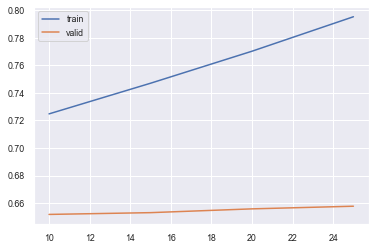

In [89]:
params = np.arange(10, 30, 5)
train = []
valid = []

for par in params:
    xgb = XGBClassifier(random_state=1,
                        n_estimators=par)
    result = cross_validate(xgb, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [90]:
params[np.argmax(valid)]

25

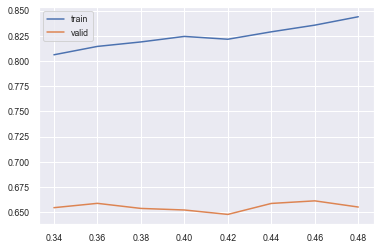

In [91]:
params = [0.34,0.36,0.38,0.40,0.42,0.44,0.46,0.48]
train = []
valid = []

for par in params:
    xgb = XGBClassifier(random_state=1,
                        n_estimators=25,
                        learning_rate=par)
    result = cross_validate(xgb, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [92]:
params[np.argmax(valid)]

0.46

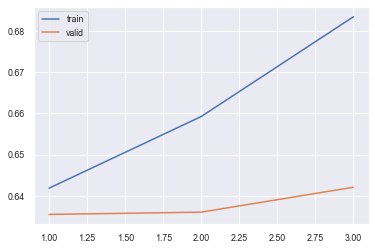

In [93]:
params = [1,2,3]
train = []
valid = []

for par in params:
    xgb = XGBClassifier(random_state=1,
                        n_estimators=25,
                        learning_rate=0.46,
                        max_depth=par)
    result = cross_validate(xgb, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [94]:
params[np.argmax(valid)]

3

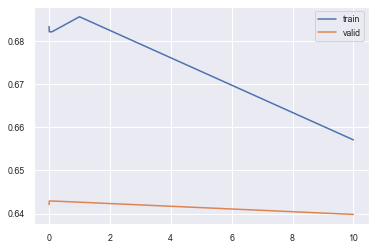

In [95]:
params = [0, 0.01, 0.1, 1, 10]
train = []
valid = []

for par in params:
    xgb = XGBClassifier(random_state=1,
                        n_estimators=25,
                        learning_rate=0.46,
                        max_depth=3,
                        gamma=par)
    result = cross_validate(xgb, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [96]:
params[np.argmax(valid)]

0.01

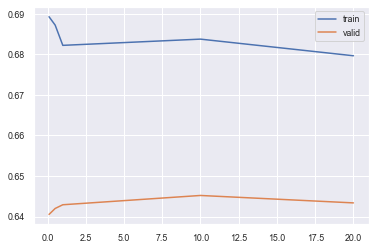

In [97]:
params = [0.1, 0.5, 1, 10, 20]
train = []
valid = []

for par in params:
    xgb = XGBClassifier(random_state=1,
                        n_estimators=25,
                        learning_rate=0.46,
                        max_depth=3,
                        gamma=0.01,
                        reg_lambda=par)
    result = cross_validate(xgb, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [98]:
params[np.argmax(valid)]

10

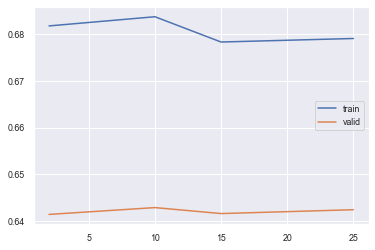

In [99]:
params = [2,10,15,25]
train = []
valid = []

for par in params:
    xgb = XGBClassifier(random_state=1,
                        n_estimators=25,
                        learning_rate=0.46,
                        max_depth=3,
                        gamma=0.01,
                        reg_lambda=10,
                        min_child_weight=par)
    result = cross_validate(xgb, X_train_sel2, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.show()

In [100]:
params[np.argmax(valid)]

10

In [101]:
xgb_final = XGBClassifier(random_state=1,
                        n_estimators=25,
                        learning_rate=0.46,
                        max_depth=3,
                        gamma=0.01,
                        reg_lambda=10,
                        min_child_weight=10)

In [102]:
xgb_final.fit(X_train_sel2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.46, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=10, ...)

In [103]:
classif_lr(X_train_sel2, y_train, xgb_final, 0.6)

              precision    recall  f1-score   support

           1       0.72      0.70      0.71      6359
           0       0.60      0.62      0.61      4557

    accuracy                           0.67     10916
   macro avg       0.66      0.66      0.66     10916
weighted avg       0.67      0.67      0.67     10916



In [104]:
classif_lr(X_test_sel2, y_test, xgb_final, 0.6)

              precision    recall  f1-score   support

           1       0.69      0.66      0.68      1590
           0       0.56      0.59      0.57      1139

    accuracy                           0.63      2729
   macro avg       0.62      0.63      0.62      2729
weighted avg       0.64      0.63      0.63      2729



## Evaluasi

### Backtesting

In [105]:
bt = pd.read_csv('model_backtesting_set.csv')

In [106]:
bt=bt.drop(feature_identitas_status, axis=1)

In [107]:
bt.isna().sum()

customer_state                     0
geolocation_lat                    1
geolocation_lng                    1
geolocation_state                  1
order_purchase_timestamp           0
order_approved_at                  1
order_delivered_carrier_date       0
order_delivered_customer_date      1
order_estimated_delivery_date      0
order_item_id                      0
shipping_limit_date                0
price                              0
freight_value                      0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
product_category_name            108
product_name_lenght              108
product_description_lenght       108
product_photos_qty               108
product_weight_g                   4
product_length_cm                  4
product_height_cm                  4
product_width_cm                   4
seller_state                       0
product_category_name_english    110
d

In [108]:
bt['geolocation_lat'] = median_imputer.transform(bt[['geolocation_lat']])
bt['geolocation_lng'] = median_imputer.transform(bt[['geolocation_lng']])
bt['geolocation_state'] = mode_imputer.transform(bt[['geolocation_state']])
bt['order_approved_at'] = mode_imputer.transform(bt[['order_approved_at']])
bt['order_delivered_customer_date'] = mode_imputer.transform(bt[['order_delivered_customer_date']])
bt['product_category_name'] = mode_imputer.transform(bt[['product_category_name']])
bt['product_name_lenght'] = median_imputer.transform(bt[['product_name_lenght']])
bt['product_description_lenght'] = median_imputer.transform(bt[['product_description_lenght']])
bt['product_photos_qty'] = median_imputer.transform(bt[['product_photos_qty']])
bt['product_weight_g'] = median_imputer.transform(bt[['product_weight_g']])
bt['product_length_cm'] = median_imputer.transform(bt[['product_length_cm']]) 
bt['product_height_cm'] = median_imputer.transform(bt[['product_height_cm']])
bt['product_width_cm'] = median_imputer.transform(bt[['product_width_cm']])       
bt['product_category_name_english'] = mode_imputer.transform(bt[['product_category_name_english']]) 

In [109]:
bt.isna().sum()

customer_state                   0
geolocation_lat                  0
geolocation_lng                  0
geolocation_state                0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_state                     0
product_category_name_english    0
dtype: int64

In [110]:
bt[data_date]=bt[data_date].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d %H:%M:%S'))

In [111]:
bt_num = bt[number]
bt_scl = pd.DataFrame(minmax.transform(bt_num), columns=number)

bt_cat = bt[cat]
bt_ohe = pd.DataFrame(ohe.transform(bt_cat).toarray(), columns=ohe.get_feature_names_out(cat))

bt_ps = bt[pseudo_num]

bt_date=bt[data_date]

bt_transformed = pd.concat([bt_scl, bt_ohe, bt_ps, bt_date],axis=1)

In [112]:
bt_transformed['purchase_to_approved']=bt_transformed['order_approved_at']-bt_transformed['order_purchase_timestamp']
bt_transformed['approved_to_delivered_carrier']=bt_transformed['order_delivered_carrier_date']-bt_transformed['order_approved_at']
bt_transformed['delivered_carrier_to_delivered_customer']=bt_transformed['order_delivered_customer_date']-bt_transformed['order_delivered_carrier_date']
bt_transformed['purchase_to_delivered_customer']=bt_transformed['order_delivered_carrier_date']-bt_transformed['order_purchase_timestamp']

In [113]:
break_date(bt_transformed,data_date)

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.326189         0.596568  0.220268       0.054439   
1            0.367345         0.834403  0.022052       0.043834   
2            0.275253         0.642571  0.007441       0.031576   
3            0.332991         0.777150  0.034555       0.057717   
4            0.294887         0.746060  0.039524       0.042875   
...               ...              ...       ...            ...   
5853         0.590493         0.891721  0.068511       0.123614   
5854         0.251918         0.606117  0.031285       0.048470   
5855         0.274611         0.639676  0.019551       0.021104   
5856         0.424073         0.548936  0.008085       0.048977   
5857         0.160876         0.530931  0.002666       0.040237   

      payment_value  product_name_lenght  product_description_lenght  \
0          0.148239             0.950820                    0.976890   
1          0.016968             0.540984                    0.365737   
2          0.006700             0.885246                    0.089174   
3          0.025930             0.852459                    0.405928   
4          0.028442             0.885246                    0.272293   
...             ...                  ...                         ...   
5853       0.051723             0.459016                    0.082391   
5854       0.023297             0.901639                    0.516453   
5855       0.014146             0.868852                    0.184125   
5856       0.008022             0.754098                    0.094449   
5857       0.003997             0.803279                    0.234866   

      product_weight_g  product_length_cm  product_height_cm  \
0             0.030874           0.193878           0.038835   
1             0.042006           0.102041           0.262136   
2             0.022215           0.244898           0.106796   
3             0.058086           0.091837           0.368932   
4             0.007174           0.102041           0.058252   
...                ...                ...                ...   
5853          0.166935           0.479592           0.155340   
5854          0.042006           0.091837           0.291262   
5855          0.008609           0.091837           0.000000   
5856          0.003043           0.122449           0.029126   
5857          0.001187           0.091837           0.029126   

      product_width_cm  customer_state_AC  customer_state_AL  \
0             0.202020                0.0                0.0   
1             0.161616                0.0                0.0   
2             0.202020                0.0                0.0   
3             0.101010                0.0                0.0   
4             0.060606                0.0                0.0   
...                ...                ...                ...   
5853          0.474747                0.0                0.0   
5854          0.282828                0.0                0.0   
5855          0.141414                0.0                0.0   
5856          0.050505                0.0                0.0   
5857          0.050505                0.0                0.0   

      customer_state_AM  customer_state_AP  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
5853                0.0                0.0                1.0   
5854                0.0                0.0                0.0   
5855                0.0                0.0                0.0   
5856                0.0                0.0                0.0   
5857                0.0                0.0                0.0   

      customer_st

In [114]:
break_date2(bt_transformed,data_date2)

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.326189         0.596568  0.220268       0.054439   
1            0.367345         0.834403  0.022052       0.043834   
2            0.275253         0.642571  0.007441       0.031576   
3            0.332991         0.777150  0.034555       0.057717   
4            0.294887         0.746060  0.039524       0.042875   
...               ...              ...       ...            ...   
5853         0.590493         0.891721  0.068511       0.123614   
5854         0.251918         0.606117  0.031285       0.048470   
5855         0.274611         0.639676  0.019551       0.021104   
5856         0.424073         0.548936  0.008085       0.048977   
5857         0.160876         0.530931  0.002666       0.040237   

      payment_value  product_name_lenght  product_description_lenght  \
0          0.148239             0.950820                    0.976890   
1          0.016968             0.540984                    0.365737   
2          0.006700             0.885246                    0.089174   
3          0.025930             0.852459                    0.405928   
4          0.028442             0.885246                    0.272293   
...             ...                  ...                         ...   
5853       0.051723             0.459016                    0.082391   
5854       0.023297             0.901639                    0.516453   
5855       0.014146             0.868852                    0.184125   
5856       0.008022             0.754098                    0.094449   
5857       0.003997             0.803279                    0.234866   

      product_weight_g  product_length_cm  product_height_cm  \
0             0.030874           0.193878           0.038835   
1             0.042006           0.102041           0.262136   
2             0.022215           0.244898           0.106796   
3             0.058086           0.091837           0.368932   
4             0.007174           0.102041           0.058252   
...                ...                ...                ...   
5853          0.166935           0.479592           0.155340   
5854          0.042006           0.091837           0.291262   
5855          0.008609           0.091837           0.000000   
5856          0.003043           0.122449           0.029126   
5857          0.001187           0.091837           0.029126   

      product_width_cm  customer_state_AC  customer_state_AL  \
0             0.202020                0.0                0.0   
1             0.161616                0.0                0.0   
2             0.202020                0.0                0.0   
3             0.101010                0.0                0.0   
4             0.060606                0.0                0.0   
...                ...                ...                ...   
5853          0.474747                0.0                0.0   
5854          0.282828                0.0                0.0   
5855          0.141414                0.0                0.0   
5856          0.050505                0.0                0.0   
5857          0.050505                0.0                0.0   

      customer_state_AM  customer_state_AP  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
5853                0.0                0.0                1.0   
5854                0.0                0.0                0.0   
5855                0.0                0.0                0.0   
5856                0.0                0.0                0.0   
5857                0.0                0.0                0.0   

      customer_st

In [115]:
bt_transformed=bt_transformed.drop(data_date,axis=1)

In [116]:
bt_transformed=bt_transformed.drop(data_date2,axis=1)

In [117]:
bt_sel = bt_transformed.drop(drop_feature_comb, axis=1)

In [118]:
bt_sel2 = bt_sel.drop(mi_drop, axis=1)

In [119]:
bt_transformed

geolocation_lat  geolocation_lng     price  freight_value  \
0            0.326189         0.596568  0.220268       0.054439   
1            0.367345         0.834403  0.022052       0.043834   
2            0.275253         0.642571  0.007441       0.031576   
3            0.332991         0.777150  0.034555       0.057717   
4            0.294887         0.746060  0.039524       0.042875   
...               ...              ...       ...            ...   
5853         0.590493         0.891721  0.068511       0.123614   
5854         0.251918         0.606117  0.031285       0.048470   
5855         0.274611         0.639676  0.019551       0.021104   
5856         0.424073         0.548936  0.008085       0.048977   
5857         0.160876         0.530931  0.002666       0.040237   

      payment_value  product_name_lenght  product_description_lenght  \
0          0.148239             0.950820                    0.976890   
1          0.016968             0.540984                    0.365737   
2          0.006700             0.885246                    0.089174   
3          0.025930             0.852459                    0.405928   
4          0.028442             0.885246                    0.272293   
...             ...                  ...                         ...   
5853       0.051723             0.459016                    0.082391   
5854       0.023297             0.901639                    0.516453   
5855       0.014146             0.868852                    0.184125   
5856       0.008022             0.754098                    0.094449   
5857       0.003997             0.803279                    0.234866   

      product_weight_g  product_length_cm  product_height_cm  \
0             0.030874           0.193878           0.038835   
1             0.042006           0.102041           0.262136   
2             0.022215           0.244898           0.106796   
3             0.058086           0.091837           0.368932   
4             0.007174           0.102041           0.058252   
...                ...                ...                ...   
5853          0.166935           0.479592           0.155340   
5854          0.042006           0.091837           0.291262   
5855          0.008609           0.091837           0.000000   
5856          0.003043           0.122449           0.029126   
5857          0.001187           0.091837           0.029126   

      product_width_cm  customer_state_AC  customer_state_AL  \
0             0.202020                0.0                0.0   
1             0.161616                0.0                0.0   
2             0.202020                0.0                0.0   
3             0.101010                0.0                0.0   
4             0.060606                0.0                0.0   
...                ...                ...                ...   
5853          0.474747                0.0                0.0   
5854          0.282828                0.0                0.0   
5855          0.141414                0.0                0.0   
5856          0.050505                0.0                0.0   
5857          0.050505                0.0                0.0   

      customer_state_AM  customer_state_AP  customer_state_BA  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
5853                0.0                0.0                1.0   
5854                0.0                0.0                0.0   
5855                0.0                0.0                0.0   
5856                0.0                0.0                0.0   
5857                0.0                0.0                0.0   

      customer_st

In [120]:
y_pred = xgb_final.predict_proba(bt_sel2)
probs = y_pred[:, 1]

In [121]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [122]:
prediction=to_labels(probs, 0.6)

In [123]:
bt['label']=pd.DataFrame(prediction)

In [124]:
bt

customer_state  geolocation_lat  geolocation_lng geolocation_state  \
0                SP       -21.782432       -48.161717                SP   
1                ES       -20.279932       -40.298713                ES   
2                SP       -23.641973       -46.640815                SP   
3                RJ       -21.534098       -42.191535                RJ   
4                RJ       -22.925192       -43.219389                RJ   
...             ...              ...              ...               ...   
5853             BA       -12.133393       -38.403716                BA   
5854             SP       -24.493870       -47.846015                SP   
5855             SP       -23.665429       -46.736521                SP   
5856             GO       -18.208933       -49.736449                GO   
5857             SC       -27.817564       -50.331733                SC   

     order_purchase_timestamp   order_approved_at  \
0         2017-12-03 15:57:22 2017-12-05 04:12:10   
1         2017-04-04 21:00:40 2017-04-04 21:10:17   
2         2017-05-31 19:59:58 2017-05-31 20:10:17   
3         2017-12-14 21:35:29 2017-12-14 21:50:26   
4         2018-01-26 13:31:18 2018-01-29 12:52:07   
...                       ...                 ...   
5853      2017-07-21 14:33:49 2017-07-21 14:50:15   
5854      2018-06-20 20:40:54 2018-06-21 20:39:08   
5855      2017-08-07 21:11:29 2017-08-08 03:50:19   
5856      2018-07-18 21:21:02 2018-07-18 21:30:20   
5857      2017-10-25 18:30:41 2017-10-26 16:31:09   

     order_delivered_carrier_date order_delivered_customer_date  \
0             2017-12-06 18:58:57           2017-12-15 22:47:41   
1             2017-04-05 13:34:53           2017-04-11 17:10:33   
2             2017-06-01 14:48:51           2017-06-06 07:16:47   
3             2017-12-16 03:53:07           2018-01-05 18:22:47   
4             2018-01-30 19:56:25           2018-02-08 19:38:58   
...                           ...                           ...   
5853          2017-07-25 14:33:26           2017-08-11 19:22:45   
5854          2018-06-25 12:25:00           2018-06-28 13:38:28   
5855          2017-08-08 18:15:00           2017-08-09 16:27:43   
5856          2018-07-19 12:31:00           2018-07-26 15:48:43   
5857          2017-10-27 18:08:01           2017-11-01 17:13:28   

     order_estimated_delivery_date  order_item_id shipping_limit_date  \
0                       2017-12-27            1.0 2017-12-11 04:12:10   
1                       2017-05-03            1.0 2017-04-11 21:10:17   
2                       2017-06-21            1.0 2017-06-06 20:10:17   
3                       2018-01-12            1.0 2017-12-20 21:50:26   
4                       2018-02-22            1.0 2018-02-02 12:52:07   
...                            ...            ...                 ...   
5853                    2017-08-18            1.0 2017-07-27 14:50:15   
5854                    2018-07-16            1.0 2018-06-27 20:39:08   
5855                    2017-08-18            1.0 2017-08-14 03:50:19   
5856                    2018-08-08            1.0 2018-07-23 21:30:20   
5857                    2017-11-17            1.0 2017-11-01 16:14:16   

        price  freight_value  payment_sequential payment_type  \
0     1058.00          20.43                 1.0       boleto   
1      107.00          16.45                 1.0  credit_card   
2       36.90          11.85                 1.0  credit_card   
3      166.99          21.66                 1.0  credit_card   
4      190.83          16.09                 1.0  credit_card   
...       ...            ...                 ...          ...   
5853   329.90          46.39                 1.0  credit_card   
5854   151.30          18.19                 1.0  credit_card   
5855    95.00           7.92                 1.0       boleto   
5856    39.99          18.38                 1.0  credit_card   
5857    13.99          15.10                 1.0  credit_card   

    

In [125]:
bt['label'].to_csv('hasil_backtesting.csv',index=False)

In [126]:
pd.read_csv('hasil_backtesting.csv')

label
0         1
1         1
2         1
3         0
4         0
...     ...
5853      0
5854      1
5855      1
5856      1
5857      1

[5858 rows x 1 columns]

In [127]:
(bt['label']==1).sum()

3262